<ipython-input-3-0c1ac8ce92f8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


Statistical Summary of the Dataset:
       Destination Port  Flow Duration  Total Fwd Packets  \
count      58669.000000   5.866900e+04       58669.000000   
mean        5922.026436   1.386928e+07           5.309277   
std        16026.820867   2.833235e+07          17.812174   
min            0.000000   0.000000e+00           1.000000   
25%           80.000000   4.801400e+04           2.000000   
50%           80.000000   8.718550e+05           3.000000   
75%           80.000000   7.378064e+06           5.000000   
max        61538.000000   1.199981e+08        1681.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count            58669.000000                 58669.000000   
mean                 5.277506                   643.399836   
std                 25.126443                  3217.211350   
min                  0.000000                     0.000000   
25%                  1.000000                    26.000000   
50%                  4.000000             

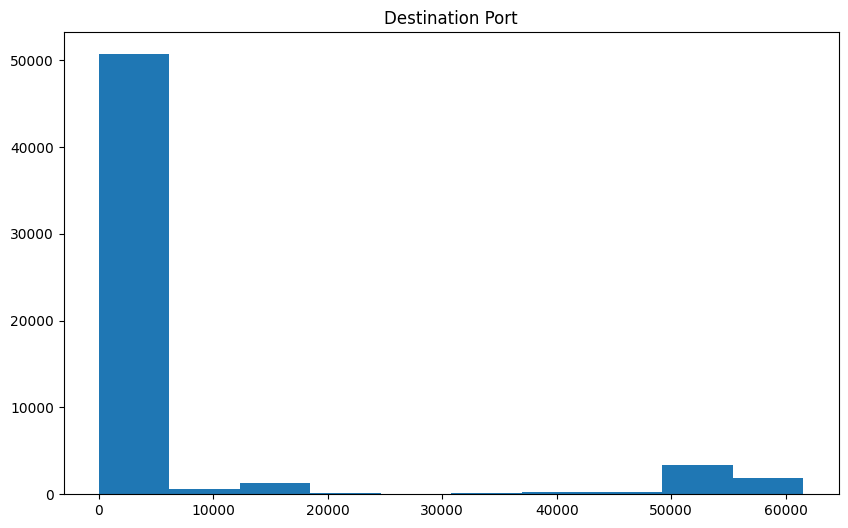

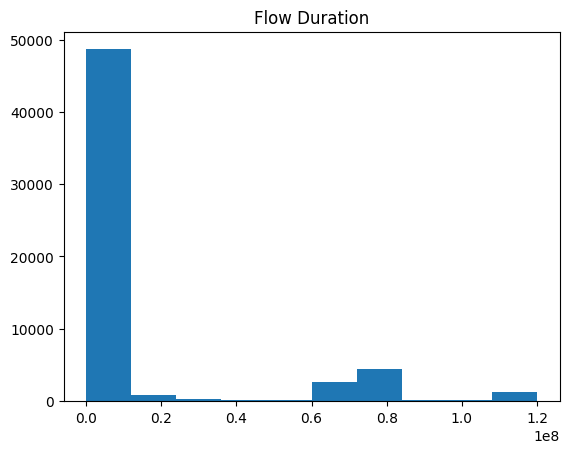

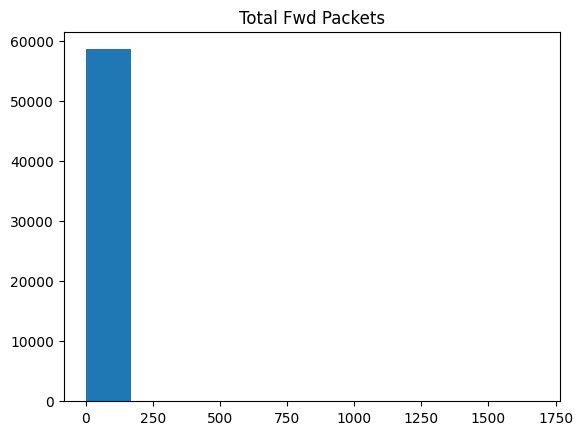

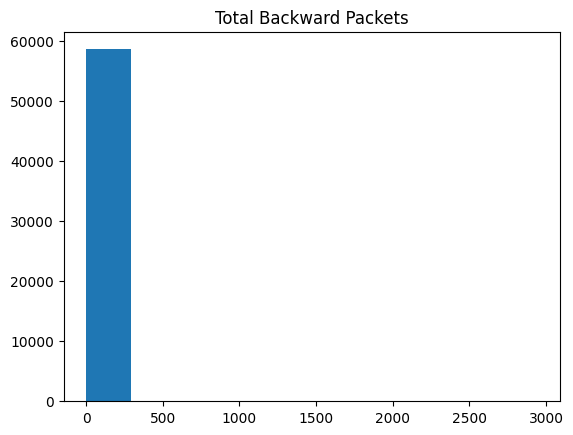

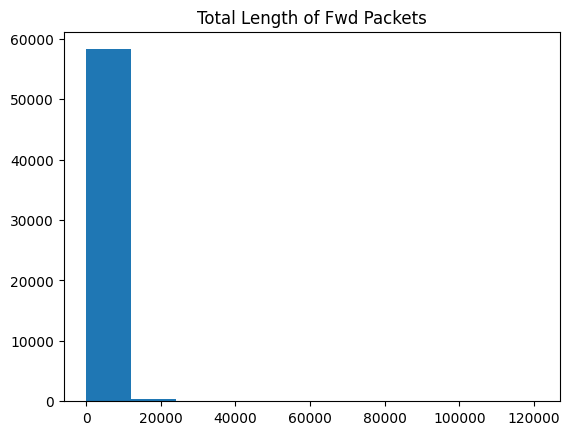

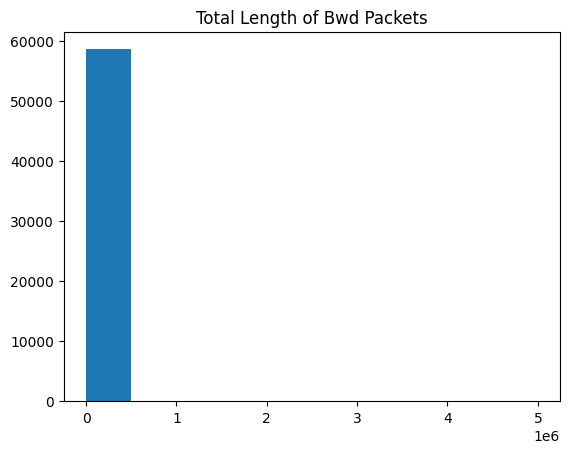

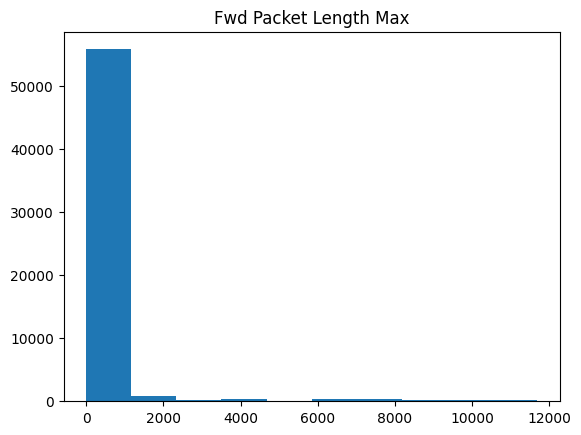

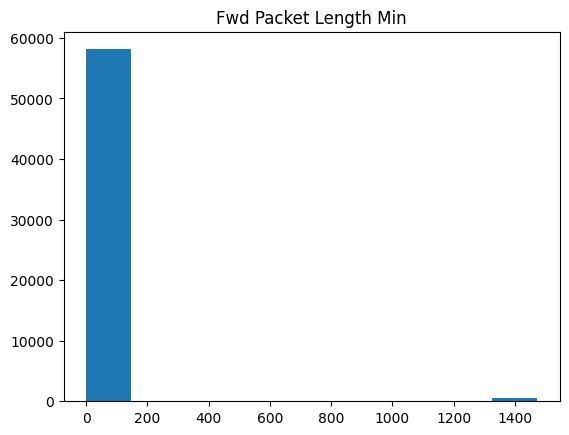

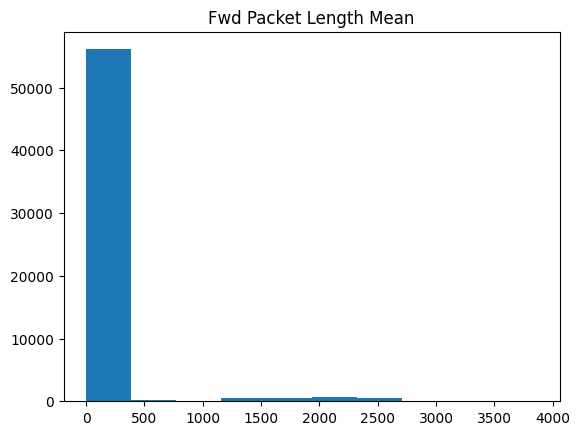

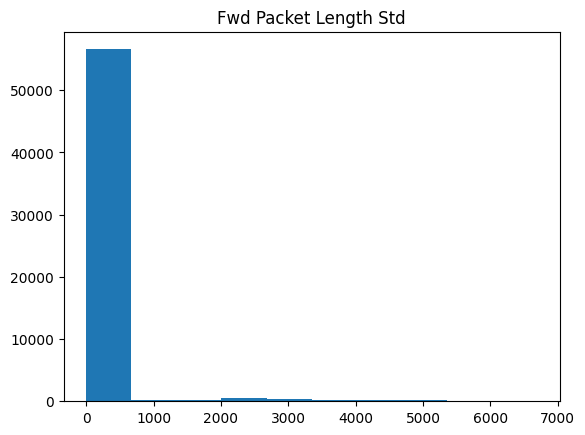

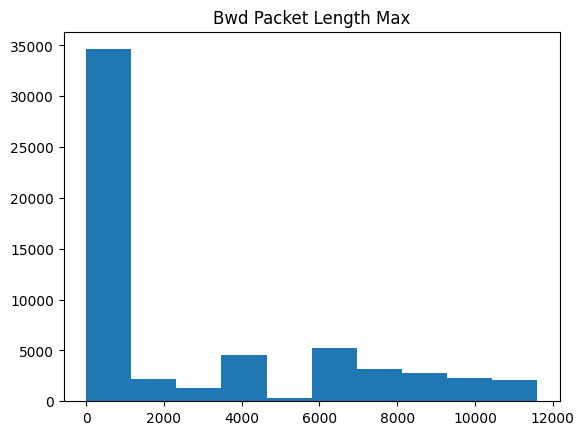

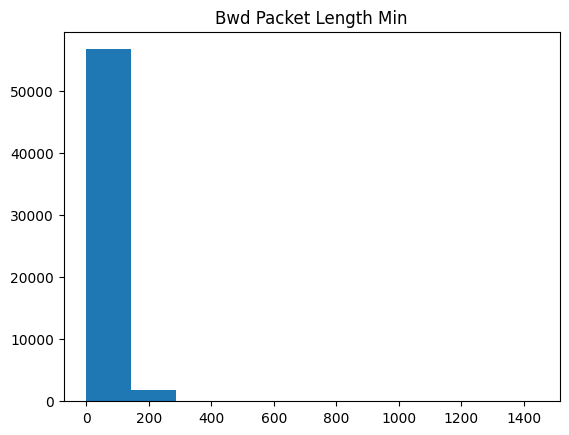

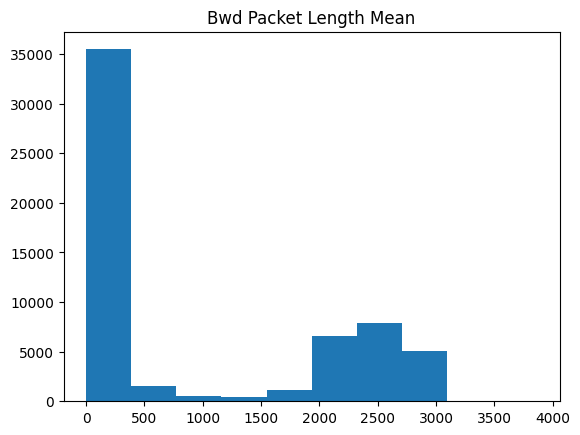

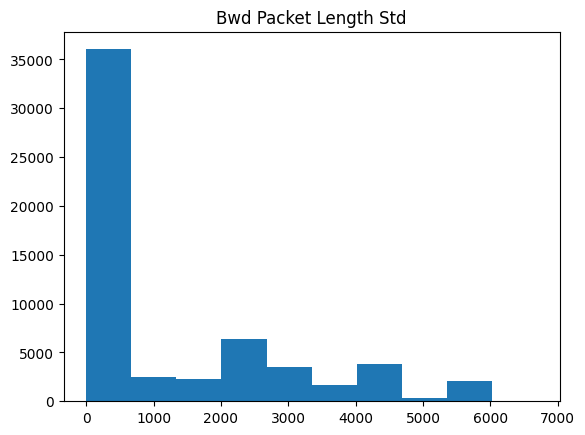

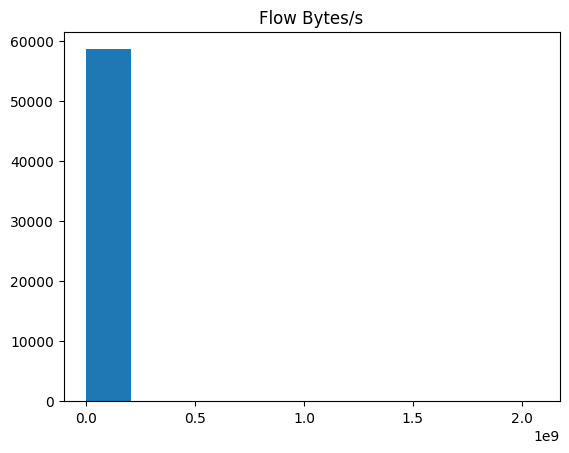

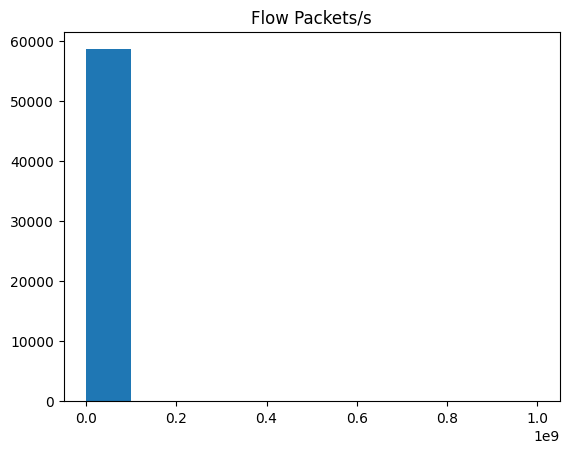

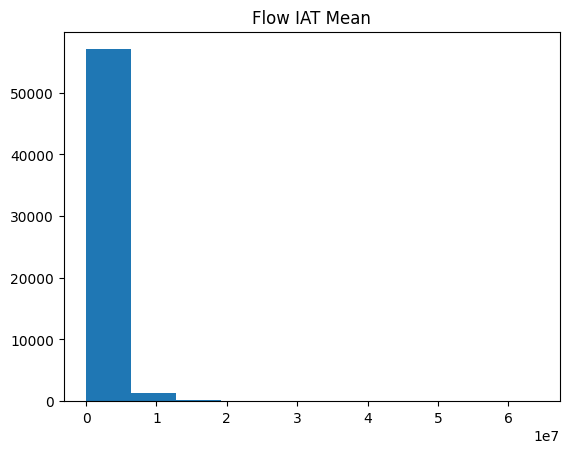

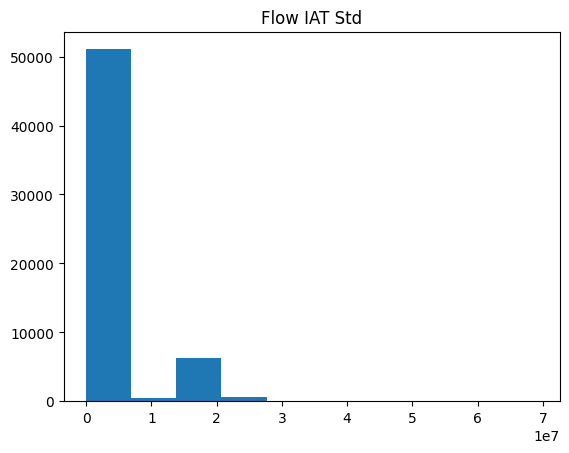

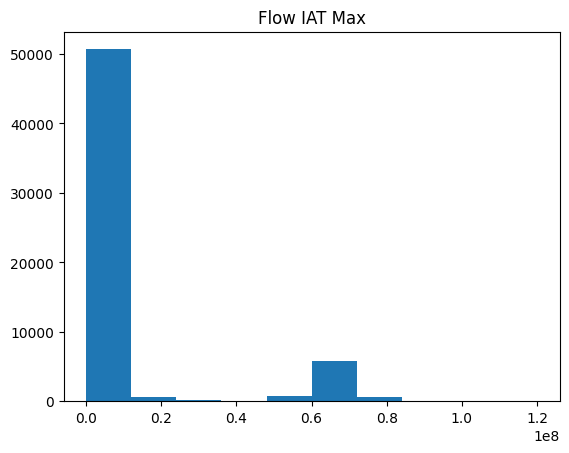

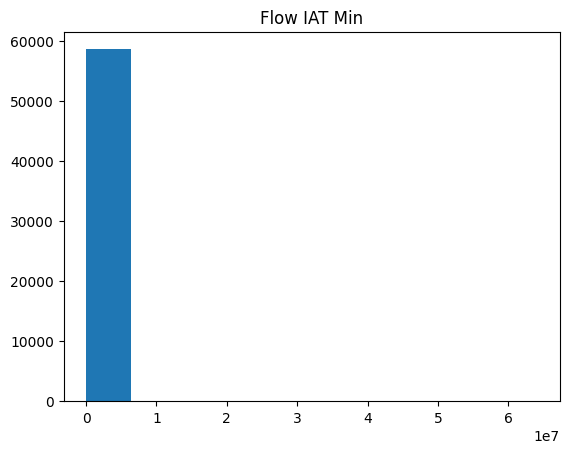

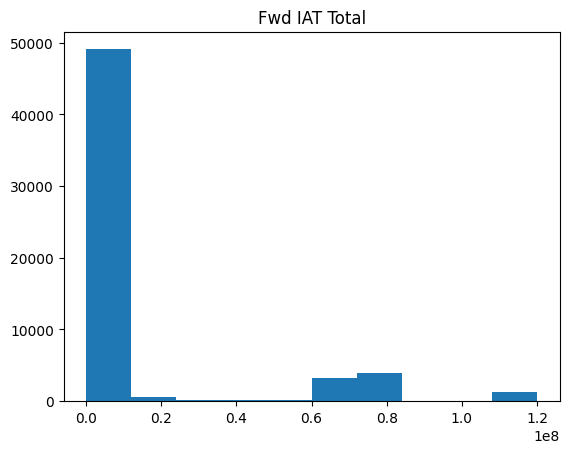

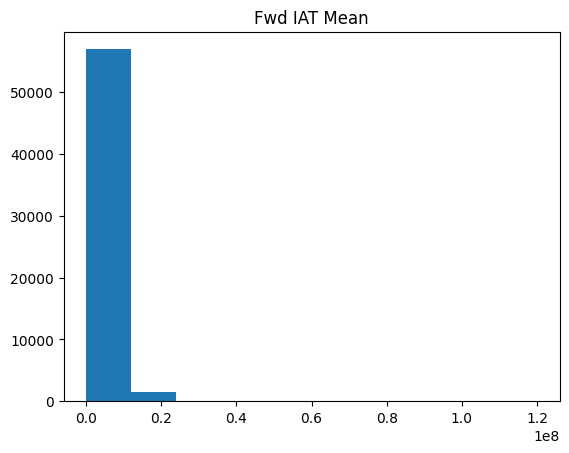

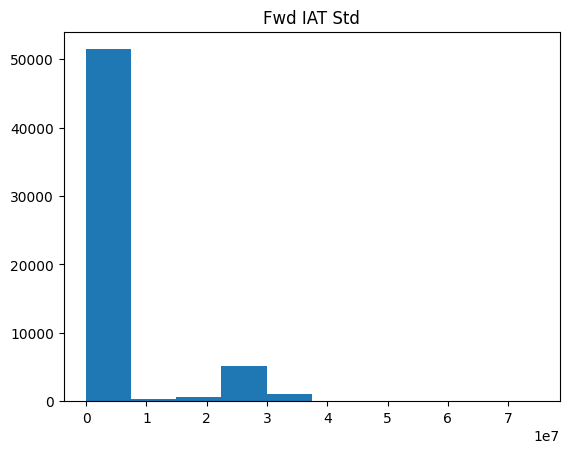

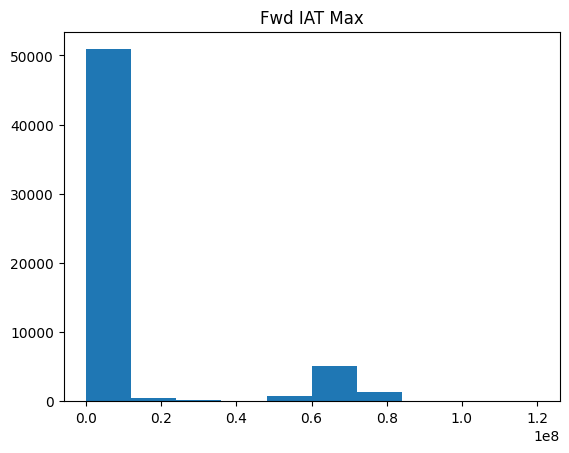

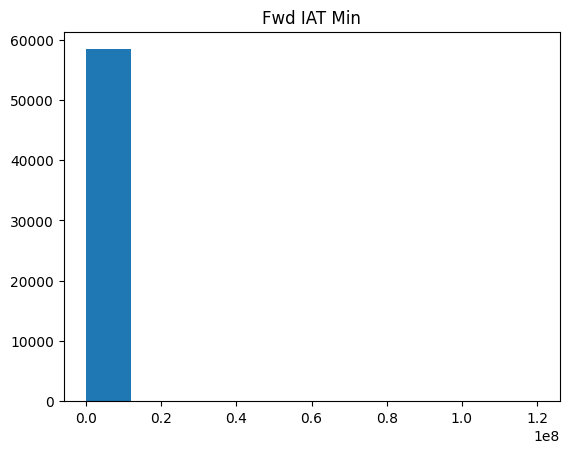

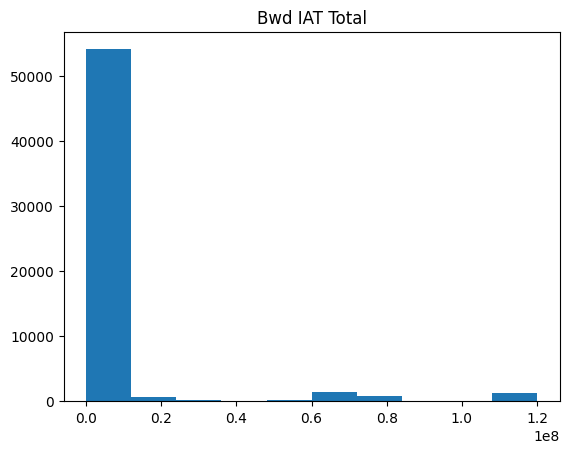

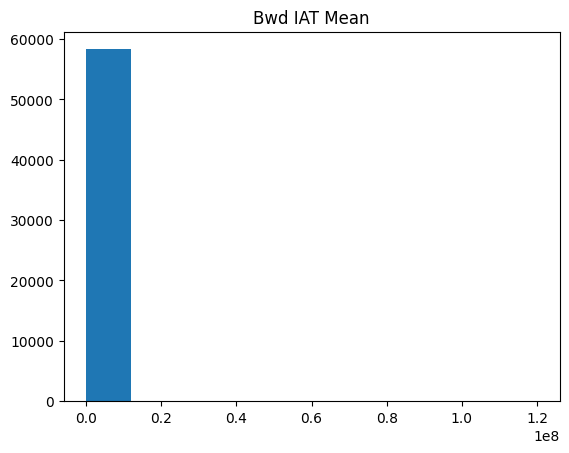

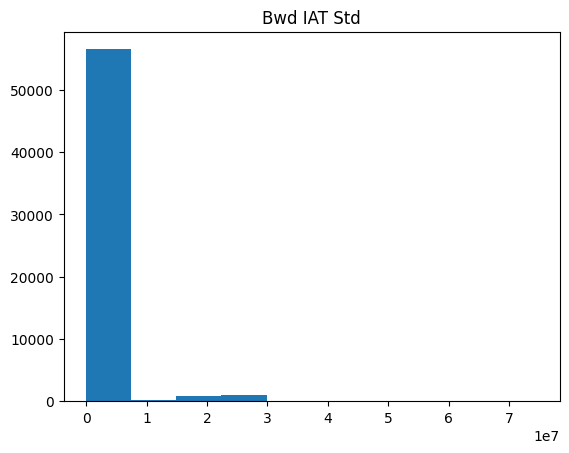

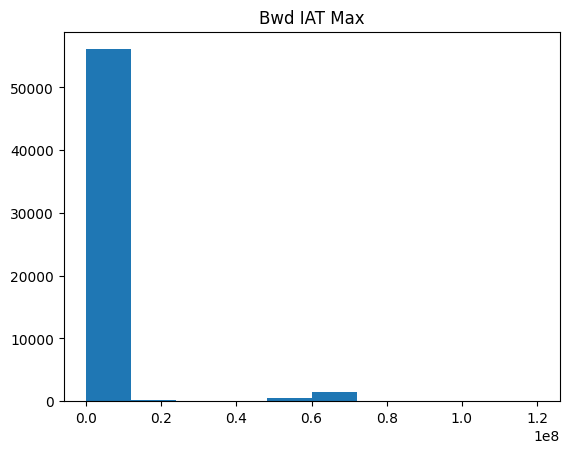

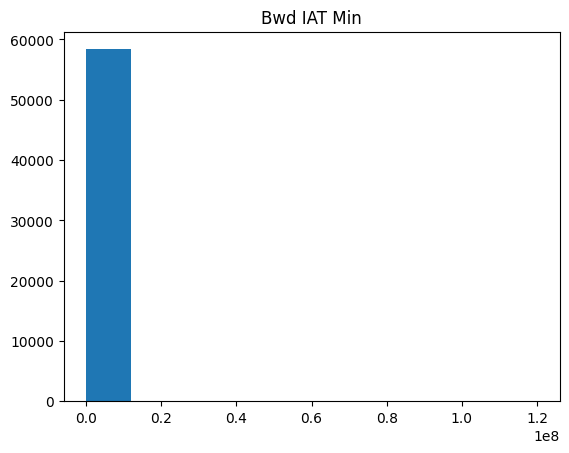

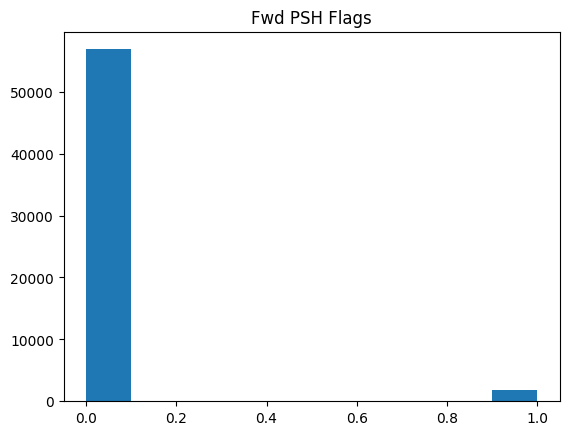

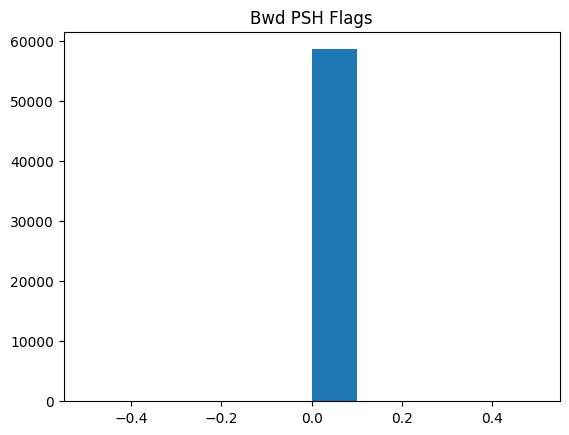

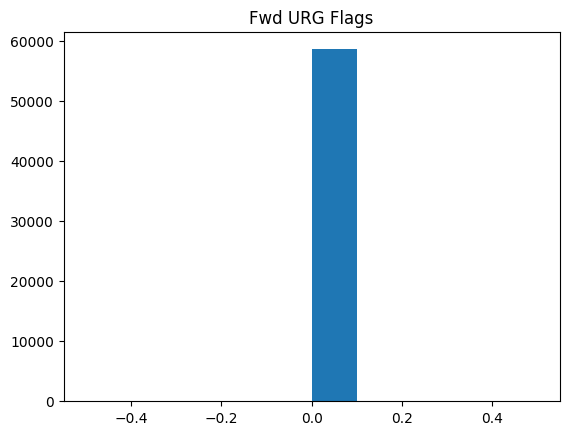

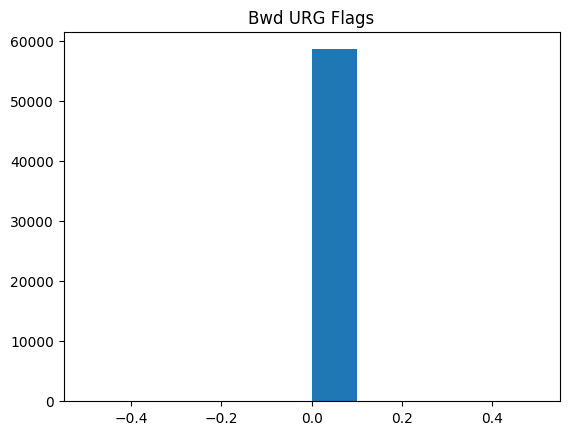

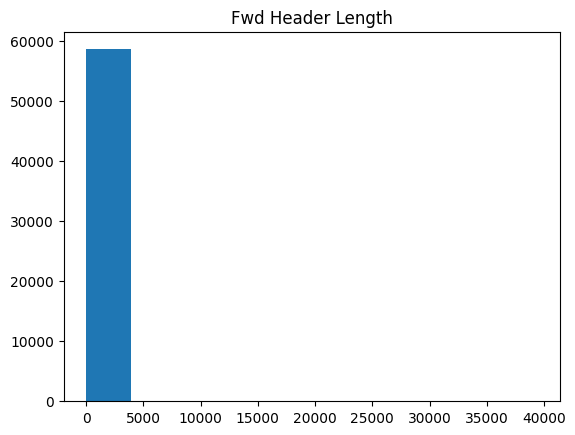

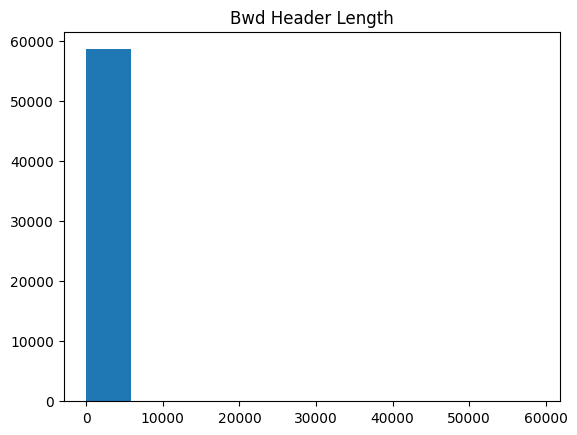

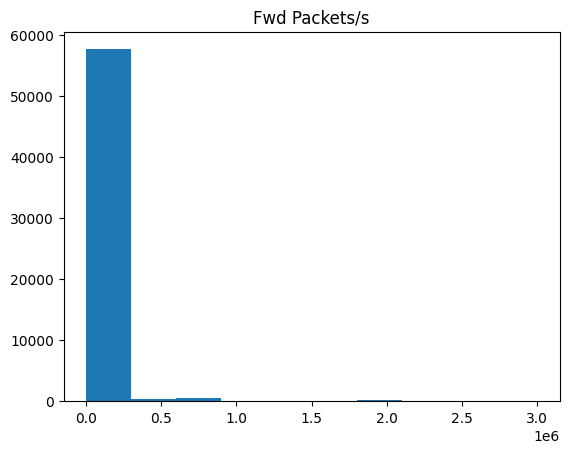

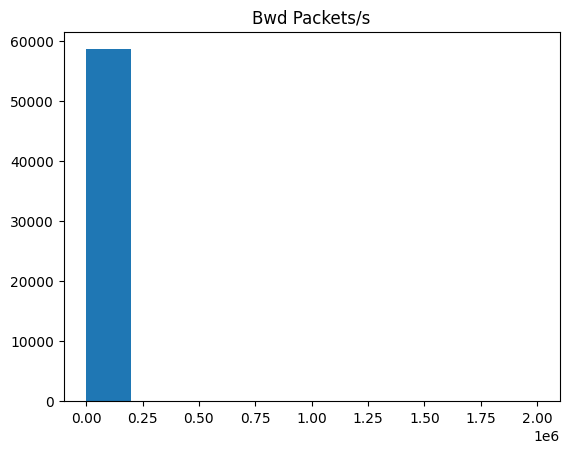

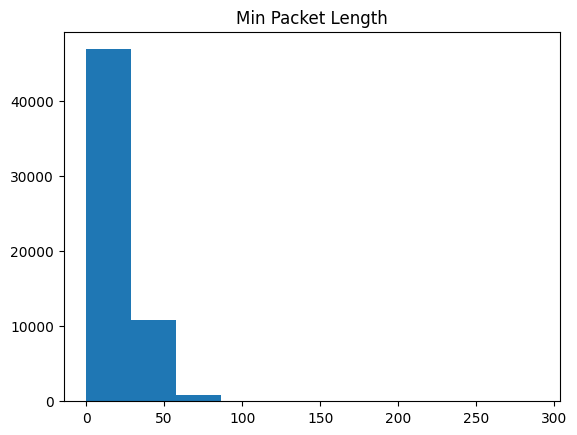

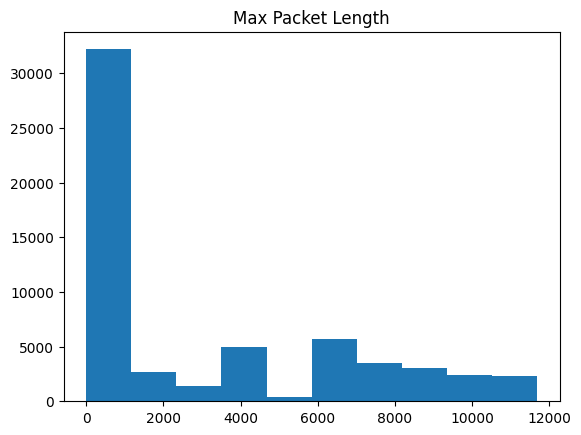

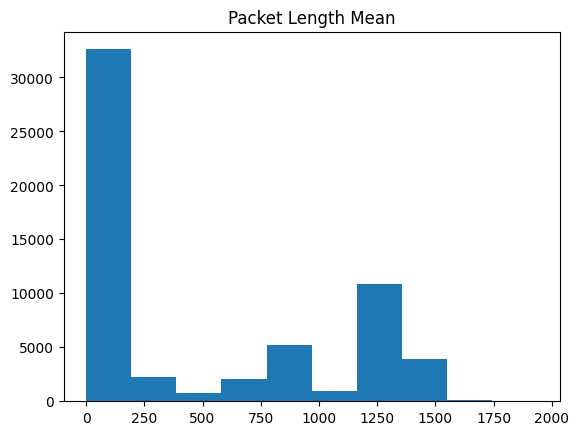

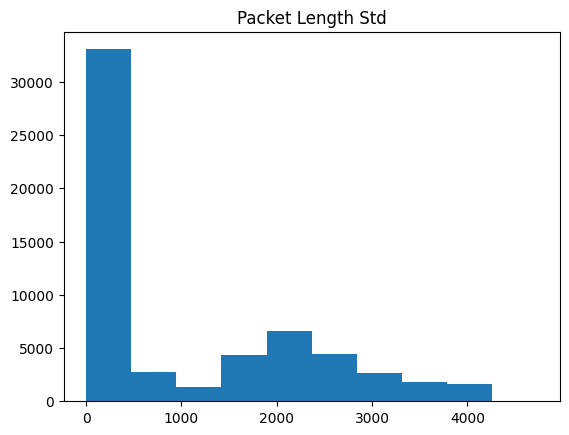

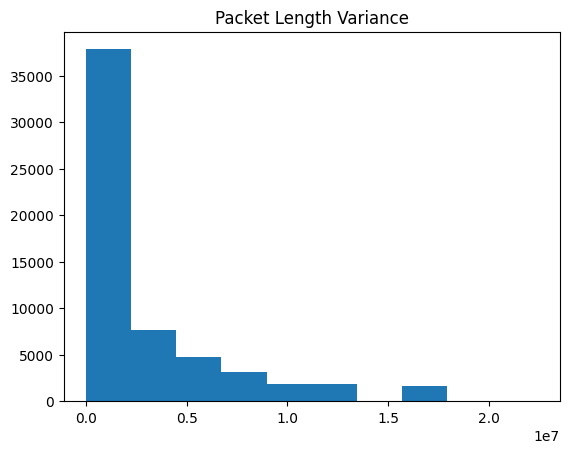

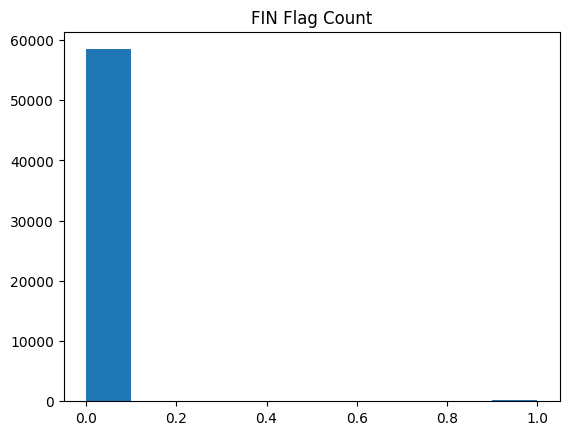

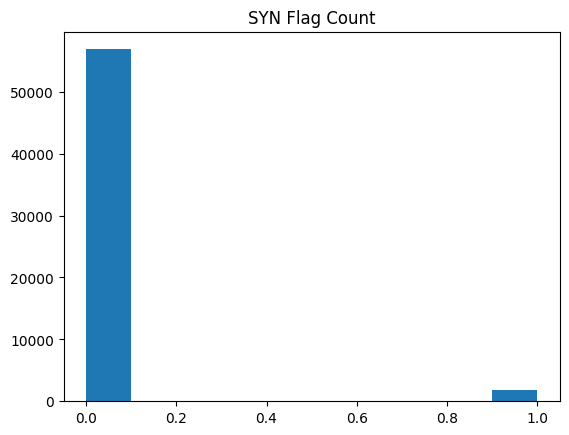

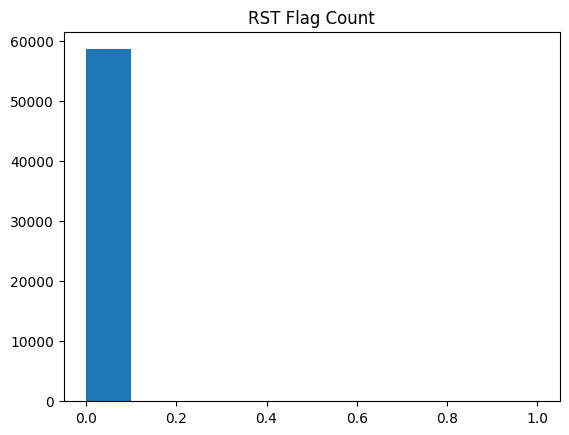

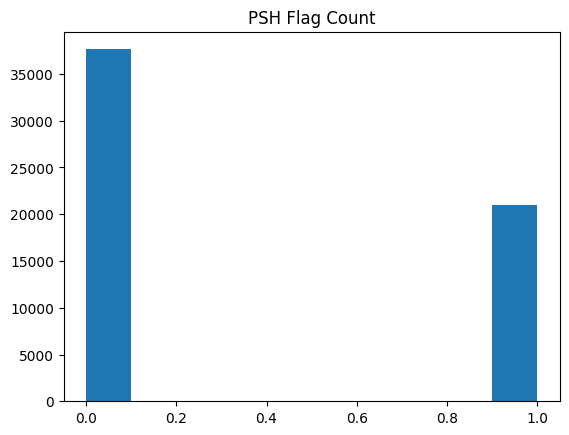

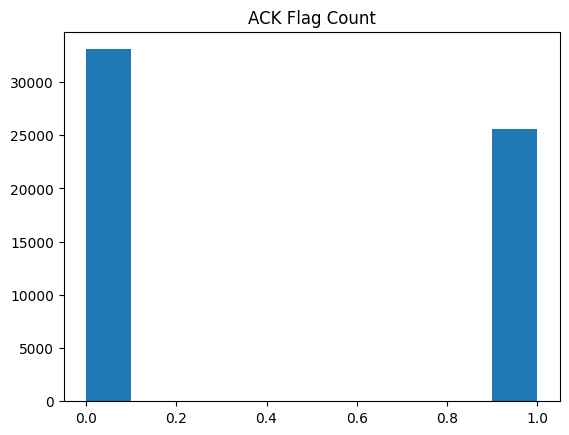

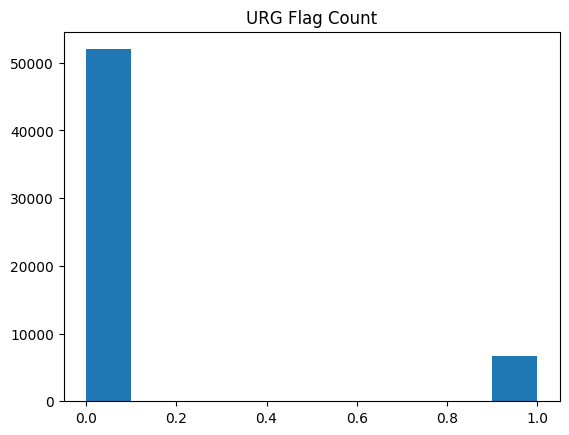

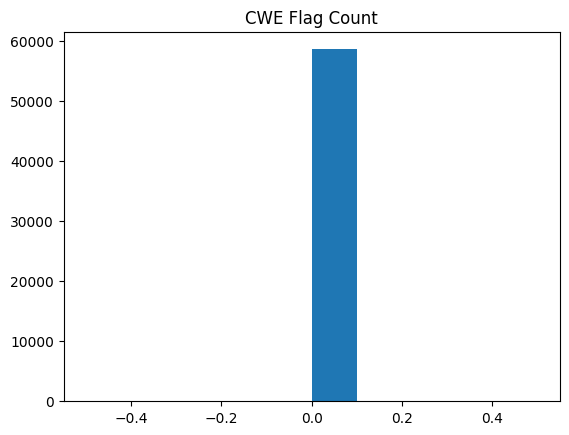

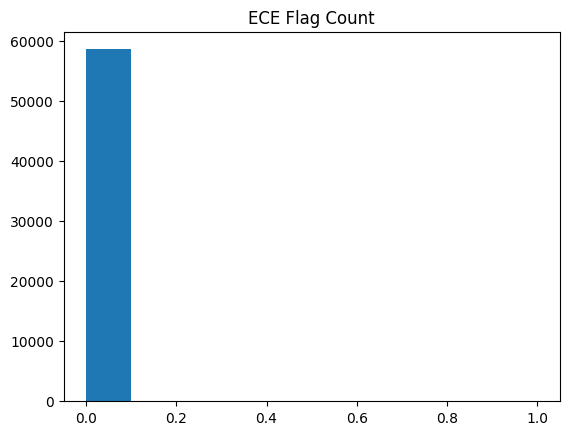

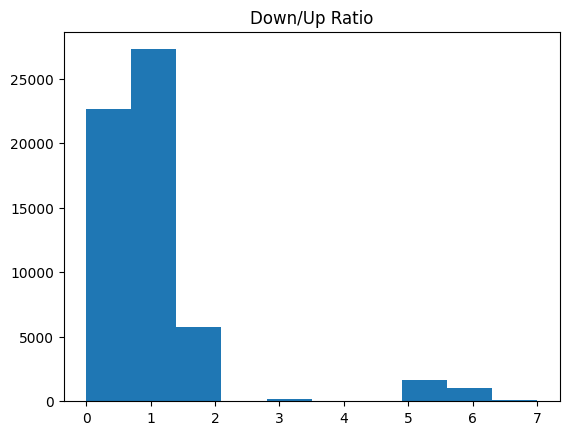

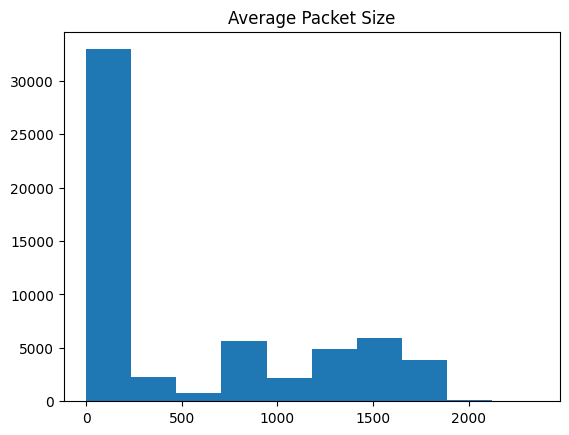

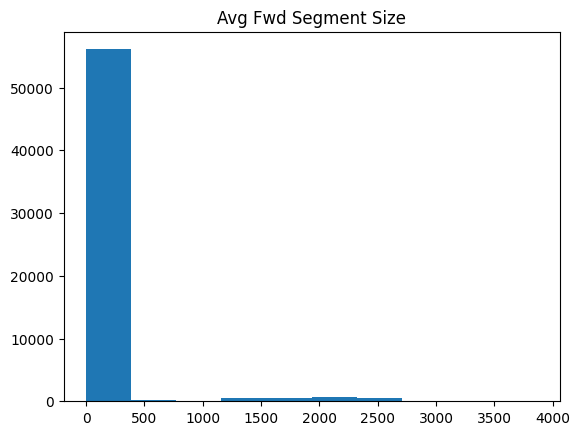

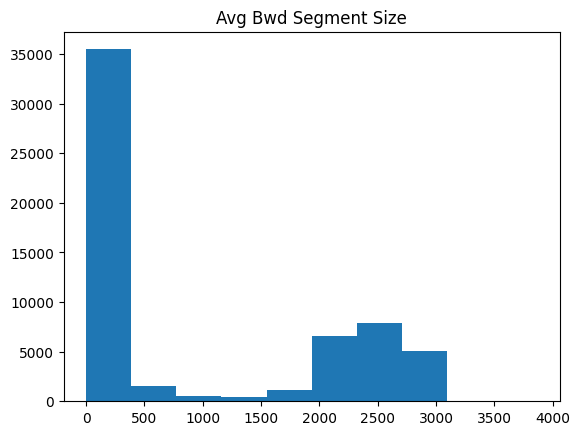

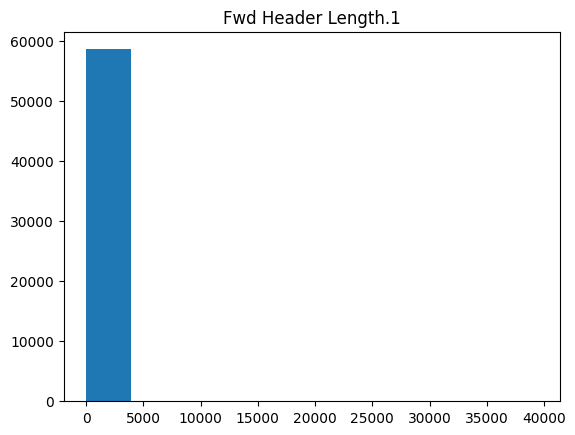

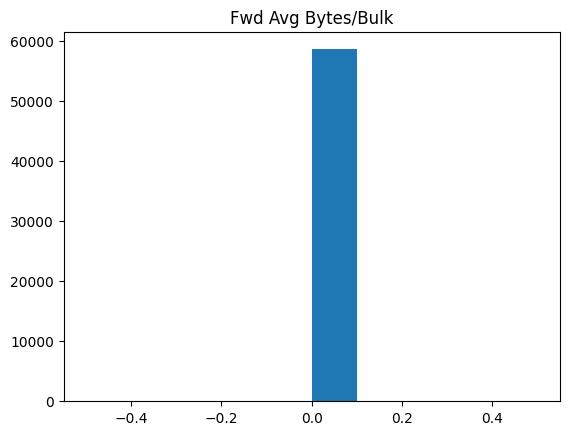

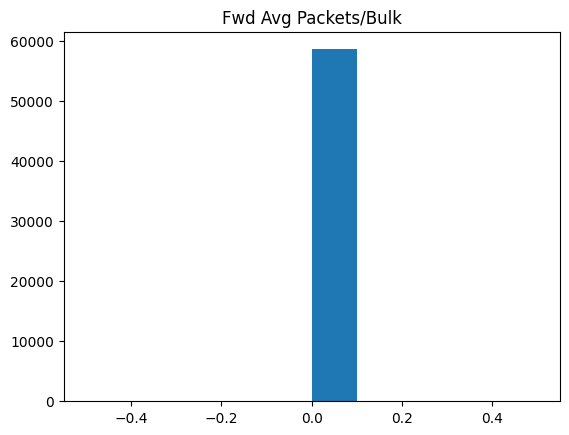

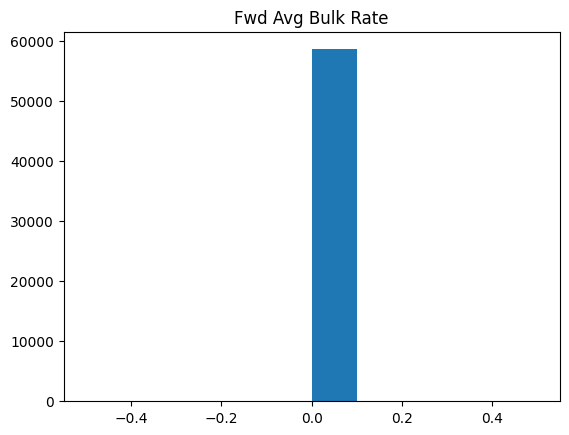

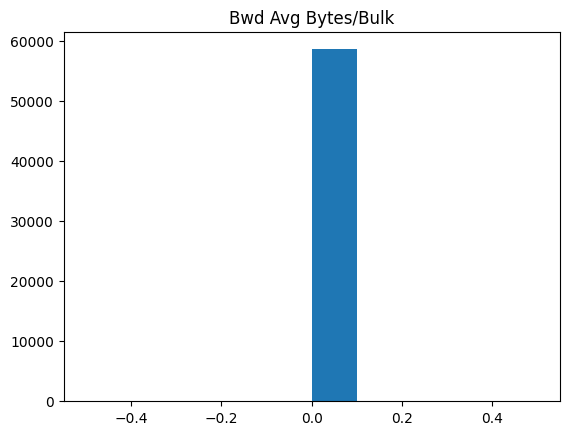

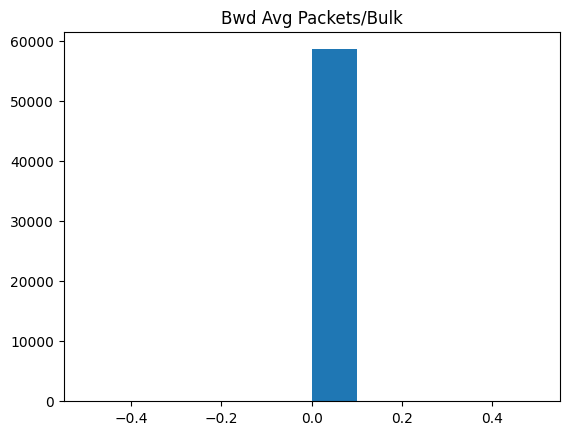

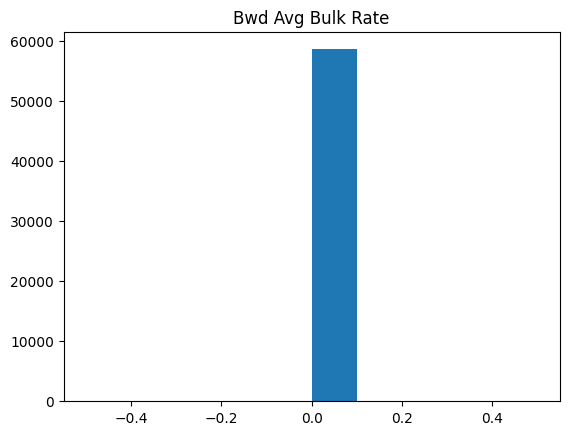

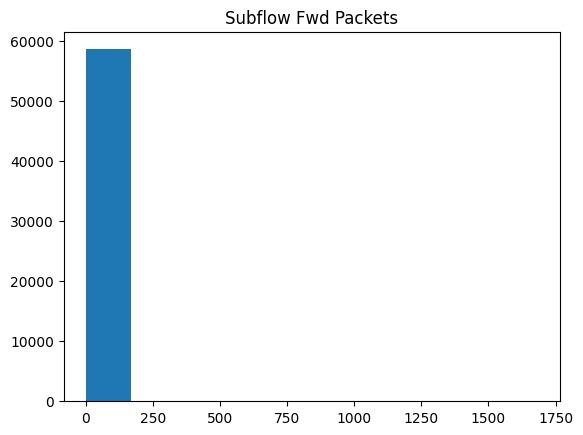

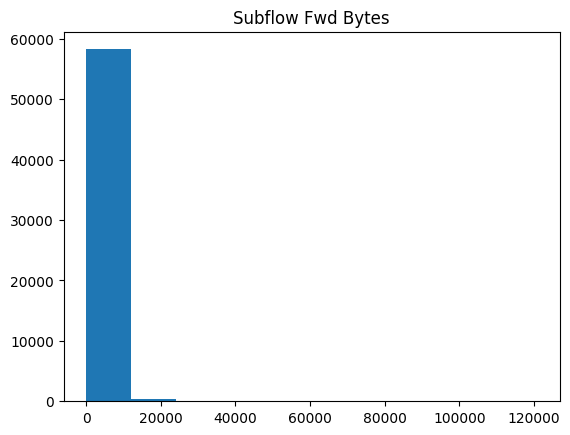

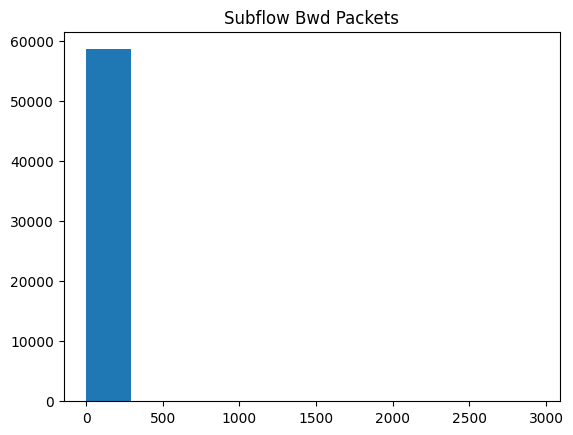

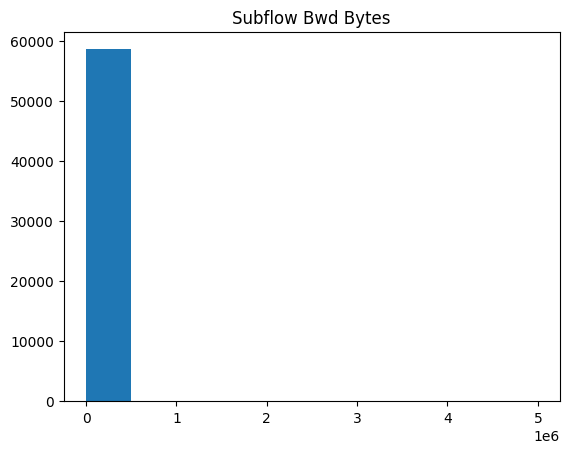

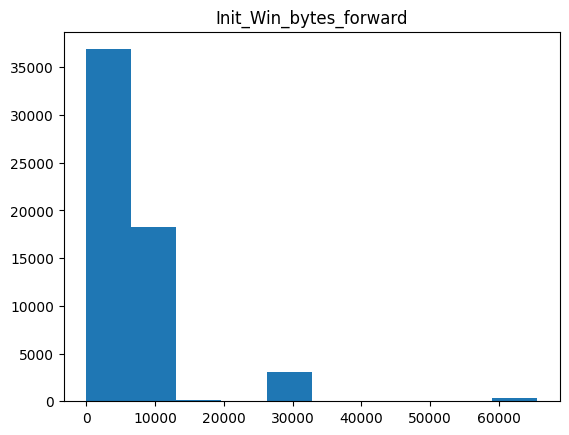

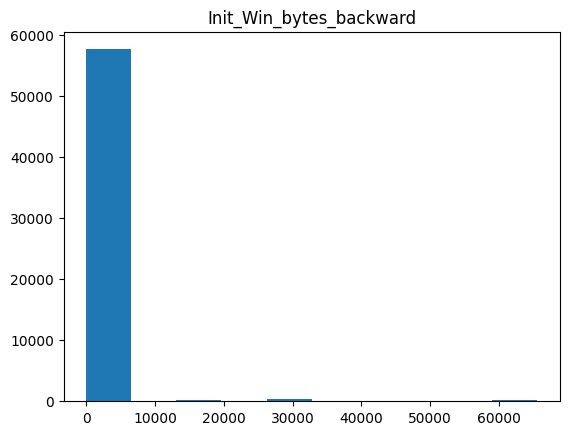

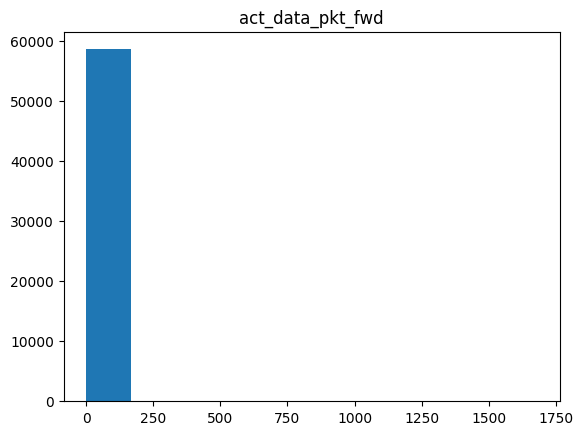

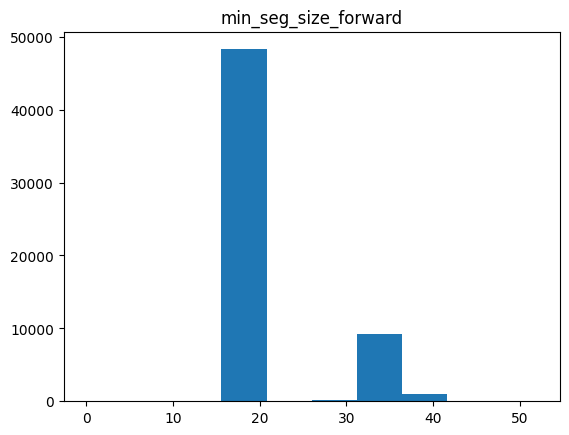

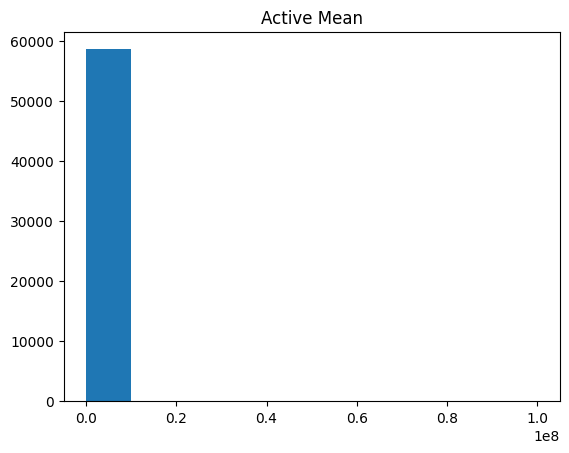

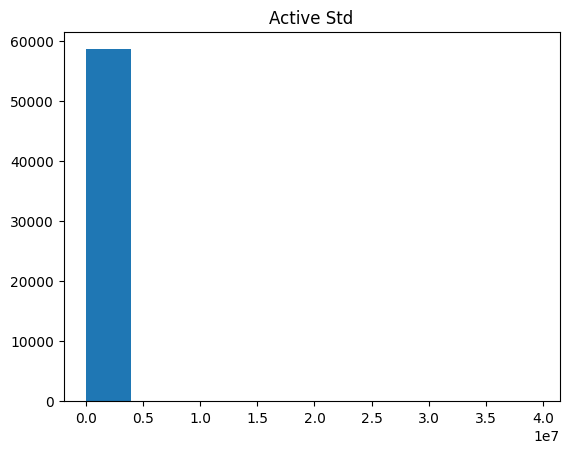

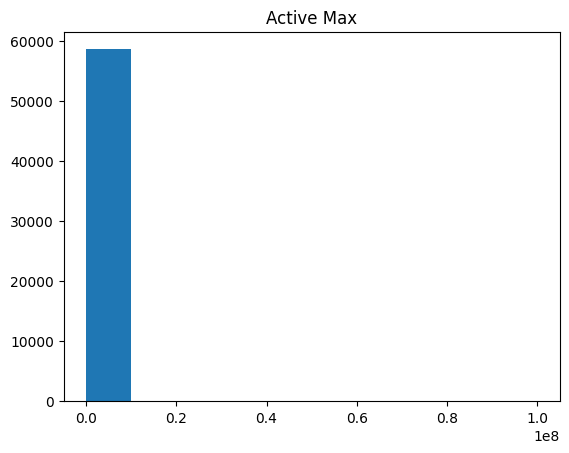

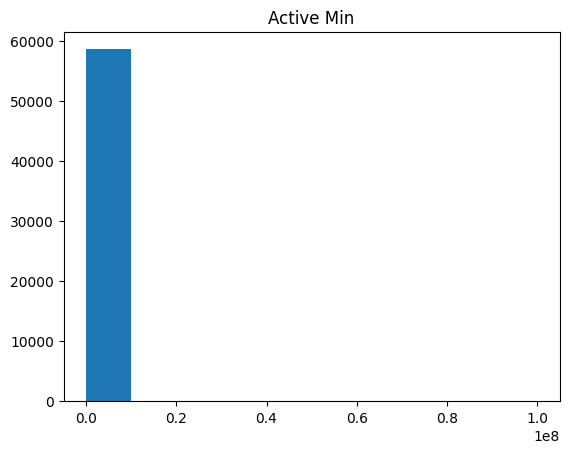

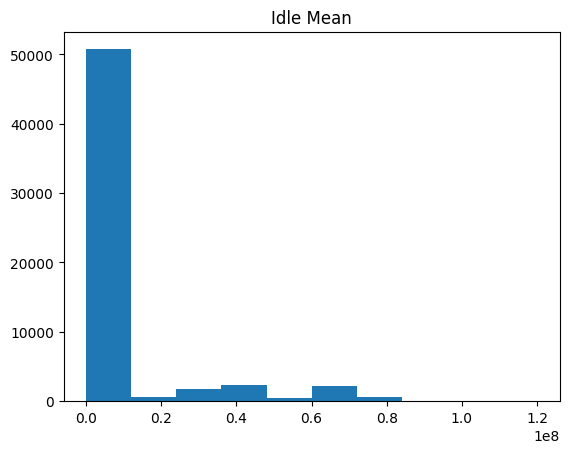

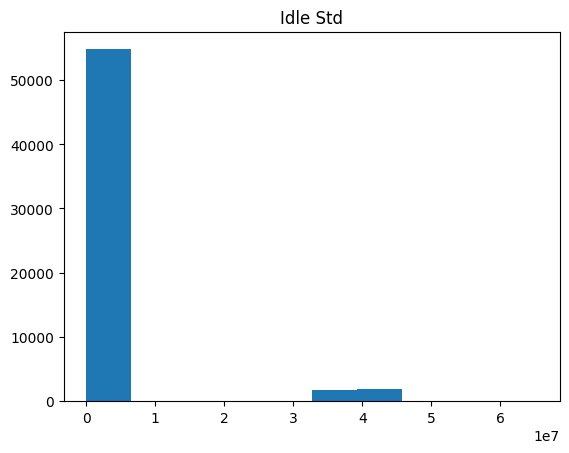

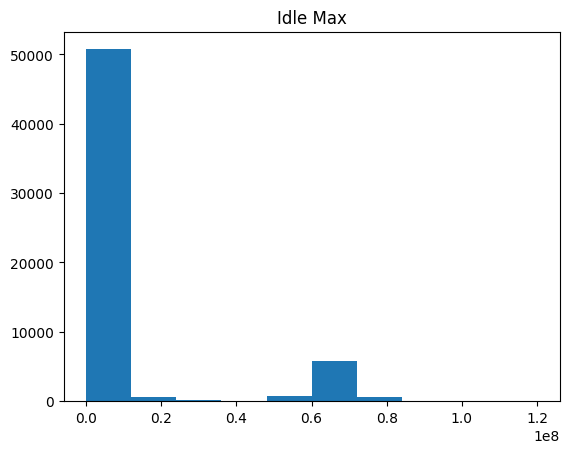

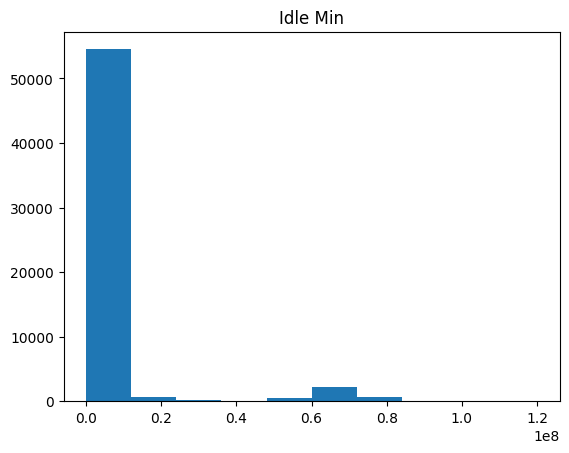

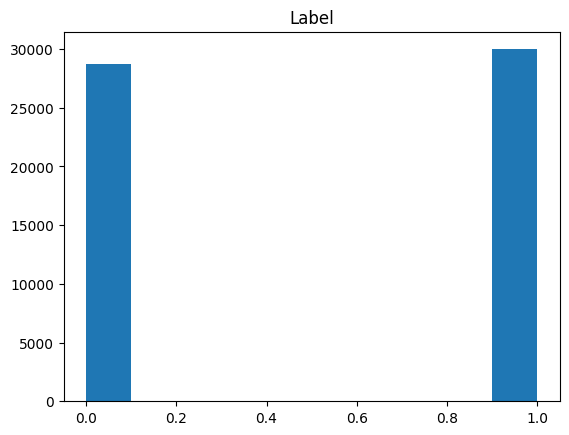

Training Random Forest Model...
Random Forest Model Trained Successfully!


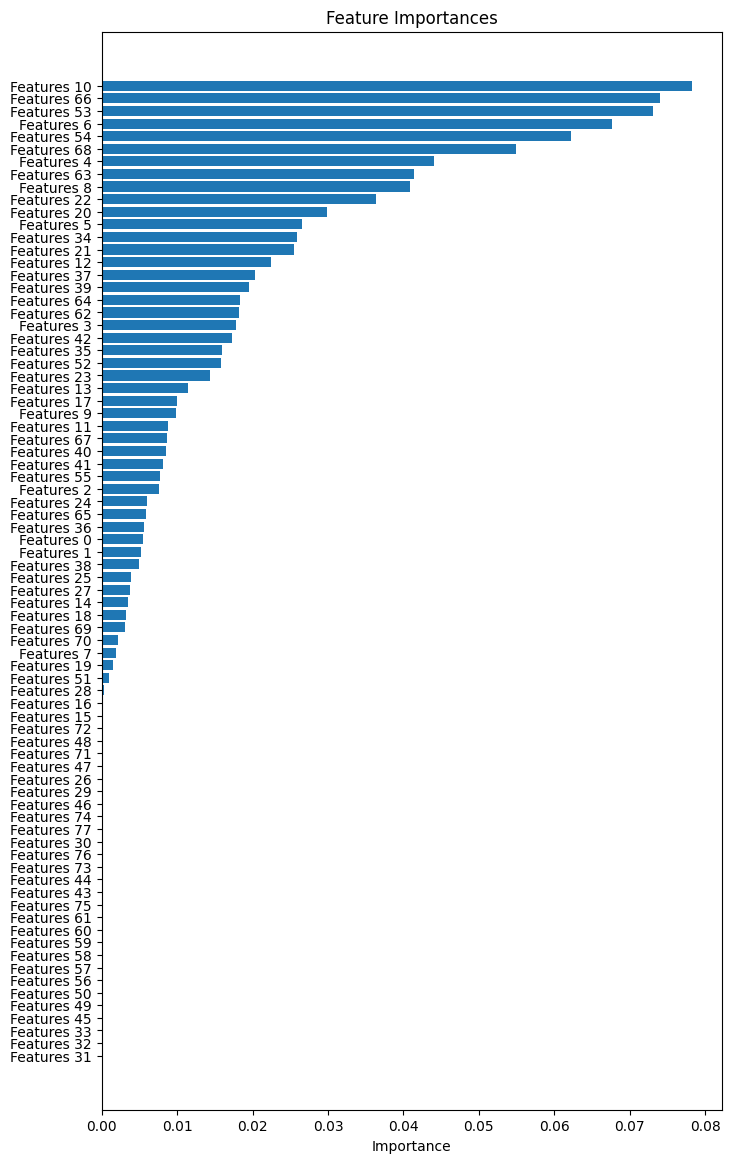

Training Neural Network Model...
Neural Network Model Trained Successfully!
Training Logistic Regression Model...
Logistic Regression Model Trained Successfully!
Random Forest Model Evaluation:
Accuracy: 0.9998
F1 Score: 0.9998
Precision: 1.0000
Recall: 0.9997
Neural Network Model Evaluation:
Accuracy: 0.9569
F1 Score: 0.9593
Precision: 0.9223
Recall: 0.9993
Logistic Regression Model Evaluation:
Accuracy: 0.9983
F1 Score: 0.9983
Precision: 0.9974
Recall: 0.9992
Creating Hybrid Model...
Hybrid Model Evaluation:
Accuracy: 0.9991
F1 Score: 0.9991
Precision: 0.9987
Recall: 0.9996
Model Comparison:
                 Model  Accuracy  F1 Score  Precision    Recall
0        Random Forest  0.999830  0.999832   1.000000  0.999664
1       Neural Network  0.956934  0.959282   0.922322  0.999328
2  Logistic Regression  0.998296  0.998323   0.997430  0.999217
3         Hybrid Model  0.999091  0.999105   0.998658  0.999552


In [ ]:
# same code but waring remove
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from itertools import cycle

# Load Data
df = pd.read_csv("/content/DDos.csv")

# Data Preprocessing
df.columns = df.columns.str.strip()
data_f = df.dropna()
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

# Data Exploration
print("Statistical Summary of the Dataset:")
print(df.describe())

plt.figure(figsize=(10, 6))
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

# Data Splitting
X = data_f.drop('Label', axis=1)
y = data_f['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model Training - Random Forest
print("Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained Successfully!")

# Feature Importance Plot
importances = rf_model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

# Model Training - Neural Network
print("Training Neural Network Model...")
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
print("Neural Network Model Trained Successfully!")

# Model Training - Logistic Regression
print("Training Logistic Regression Model...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr_model.fit(X_train_scaled, y_train)
print("Logistic Regression Model Trained Successfully!")

# Model Evaluation - Random Forest
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print("Random Forest Model Evaluation:")
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')

# Model Evaluation - Neural Network
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)
print("Neural Network Model Evaluation:")
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')

# Model Evaluation - Logistic Regression
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
print("Logistic Regression Model Evaluation:")
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')

# Hybrid Model - Averaging
print("Creating Hybrid Model...")
rf_pred_proba = rf_model.predict_proba(X_test)
nn_pred_proba = nn_model.predict_proba(X_test)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)

hybrid_pred_proba = (rf_pred_proba + nn_pred_proba + lr_pred_proba) / 3
hybrid_pred = (hybrid_pred_proba[:, 1] > 0.5).astype(int)

# Evaluate the Hybrid Model
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
hybrid_f1 = f1_score(y_test, hybrid_pred)
hybrid_precision = precision_score(y_test, hybrid_pred)
hybrid_recall = recall_score(y_test, hybrid_pred)
print("Hybrid Model Evaluation:")
print(f'Accuracy: {hybrid_accuracy:.4f}')
print(f'F1 Score: {hybrid_f1:.4f}')
print(f'Precision: {hybrid_precision:.4f}')
print(f'Recall: {hybrid_recall:.4f}')

# Create a DataFrame to store the model metrics
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'Logistic Regression', 'Hybrid Model'],
    'Accuracy': [rf_accuracy, nn_accuracy, lr_accuracy, hybrid_accuracy],
    'F1 Score': [rf_f1, nn_f1, lr_f1, hybrid_f1],
    'Precision': [rf_precision, nn_precision, lr_precision, hybrid_precision],
    'Recall': [rf_recall, nn_recall, lr_recall, hybrid_recall]
})

# Display the model comparison table
print("Model Comparison:")
print(model_comparison)


In [ ]:
def predict_input():
    # Assuming the features are named feature_1, feature_2, ..., feature_n
    input_line = input("Enter values for features separated by commas: ")
    input_values = list(map(float, input_line.split(',')))
    input_data = np.array(input_values).reshape(1, -1)
    # Assuming hybrid_pred_proba is already calculated
    hybrid_pred = (hybrid_pred_proba[:, 1] > 0.5).astype(int)
    if hybrid_pred[0] == 0:
        prediction = "BENIGN"
    else:
        prediction = "DDoS"
    print(f"The predicted label for the input is: {prediction}")

# Take user input and make prediction
predict_input()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, X_test, y_test, model_type):
    if model_type == 'Random Forest':
        pred = model.predict(X_test)
    elif model_type == 'Neural Network':
        pred = model.predict(X_test)
    elif model_type == 'Logistic Regression':
        pred = model.predict(X_test)
    elif model_type == 'Hybrid Model':
        hybrid_pred = (hybrid_pred_proba[:, 1] > 0.5).astype(int)
        pred = hybrid_pred
    else:
        raise ValueError("Invalid model type!")

    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print(f"{model_type} Model Evaluation:")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

# Load Data
df = pd.read_csv("/content/DDos.csv")

# Data Preprocessing
df.columns = df.columns.str.strip()
data_f = df.dropna()
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})




<ipython-input-14-a072233072f4>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


Statistical Summary of the Dataset:
       Destination Port  Flow Duration  Total Fwd Packets  \
count      58669.000000   5.866900e+04       58669.000000   
mean        5922.026436   1.386928e+07           5.309277   
std        16026.820867   2.833235e+07          17.812174   
min            0.000000   0.000000e+00           1.000000   
25%           80.000000   4.801400e+04           2.000000   
50%           80.000000   8.718550e+05           3.000000   
75%           80.000000   7.378064e+06           5.000000   
max        61538.000000   1.199981e+08        1681.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count            58669.000000                 58669.000000   
mean                 5.277506                   643.399836   
std                 25.126443                  3217.211350   
min                  0.000000                     0.000000   
25%                  1.000000                    26.000000   
50%                  4.000000             

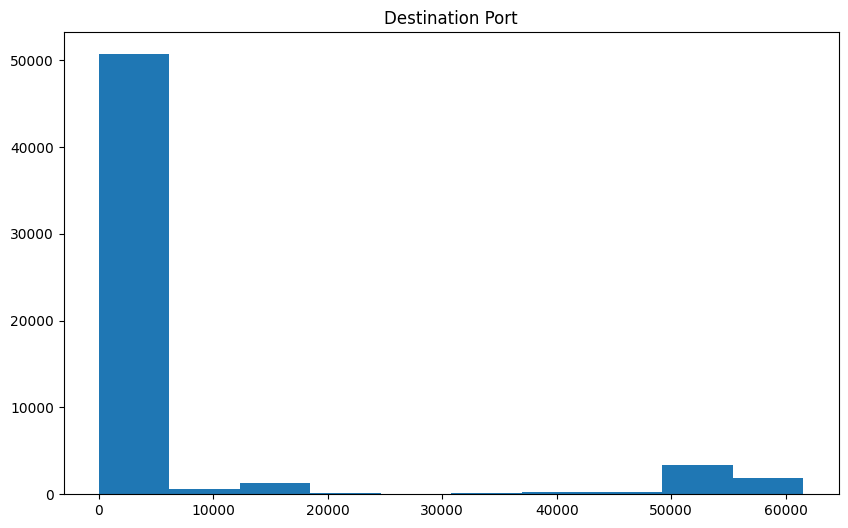

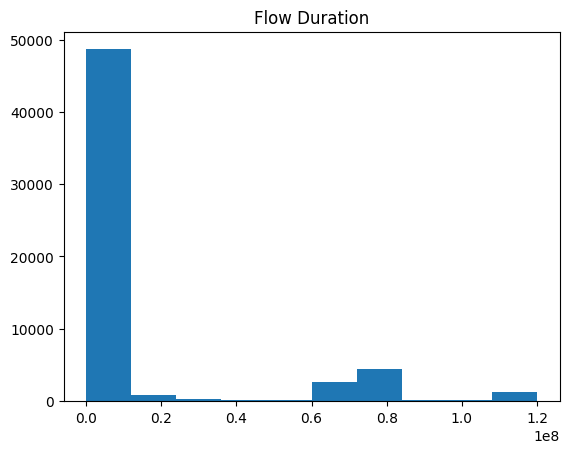

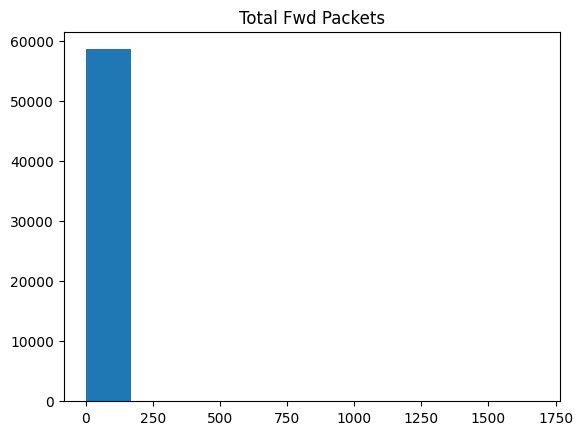

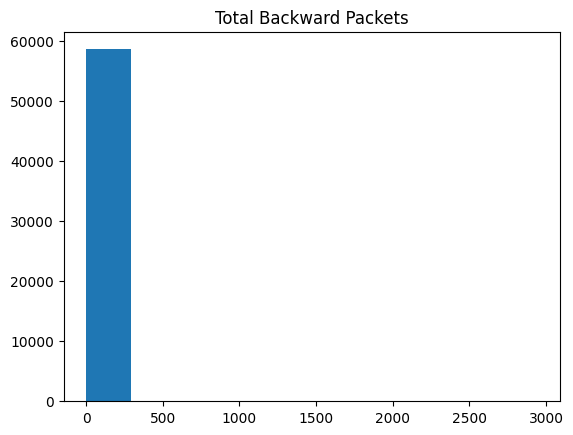

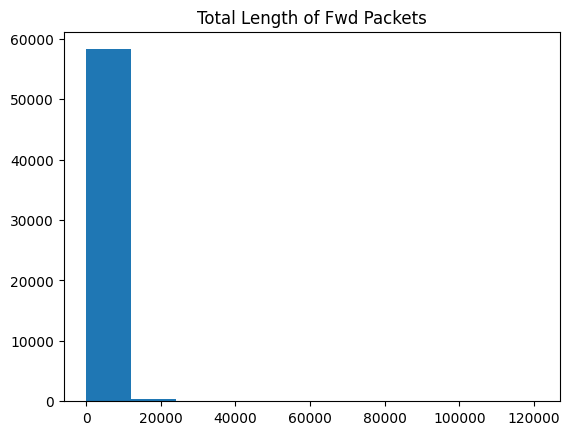

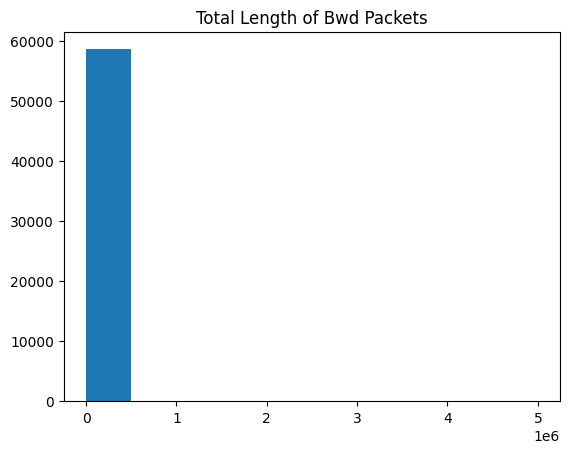

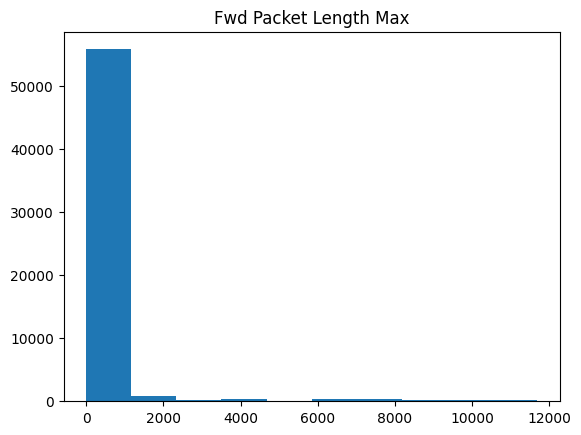

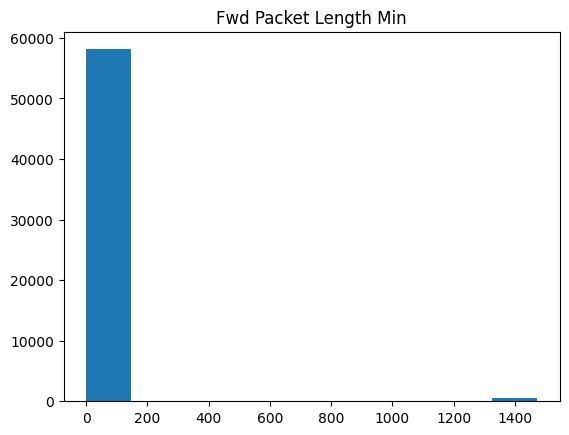

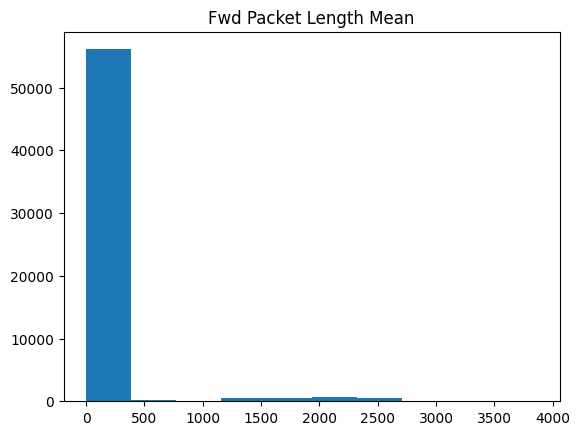

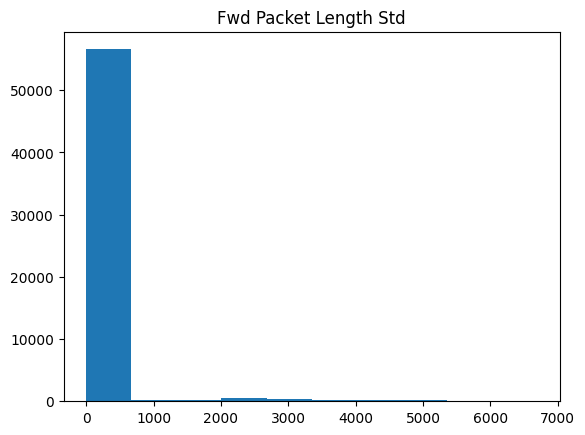

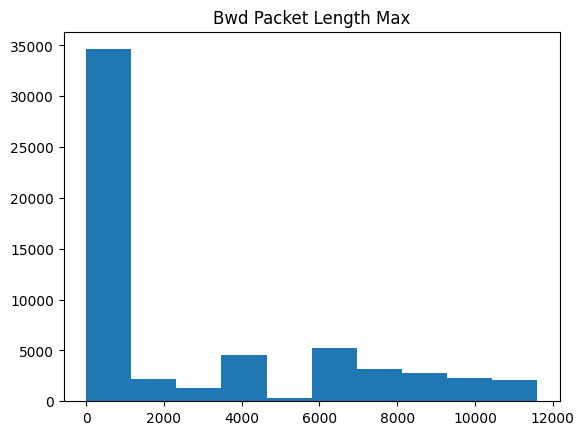

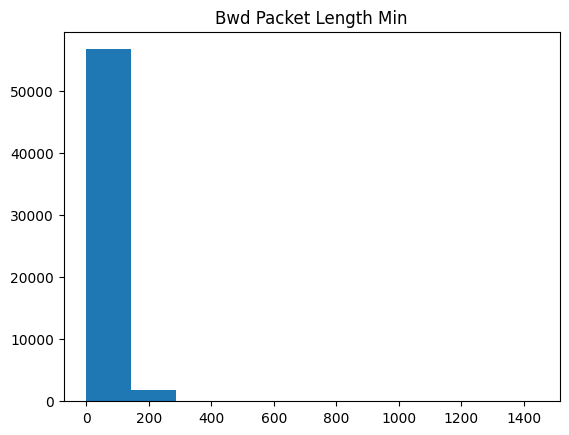

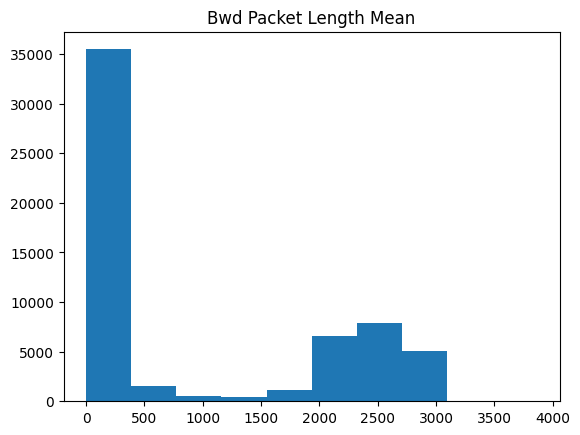

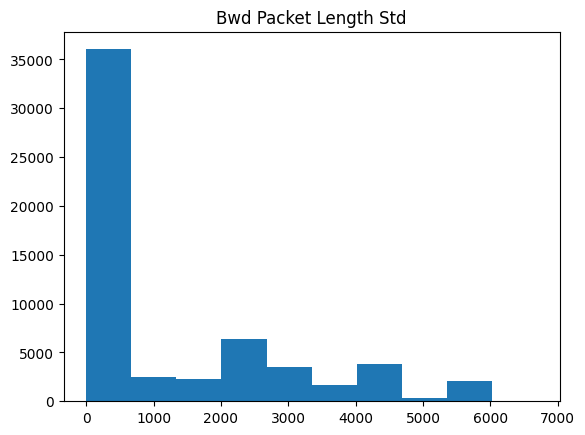

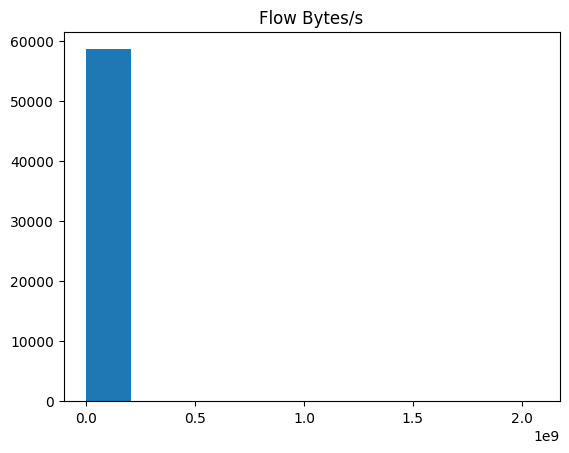

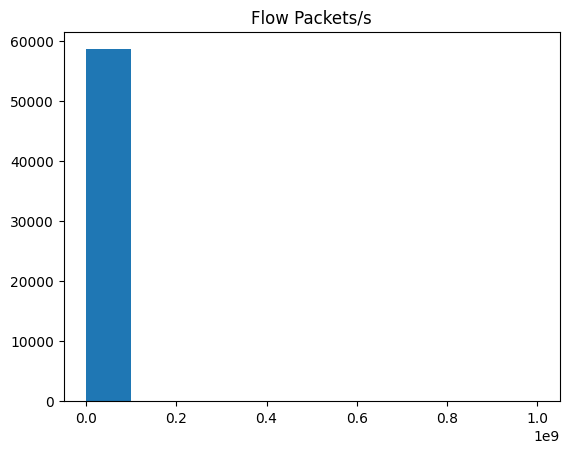

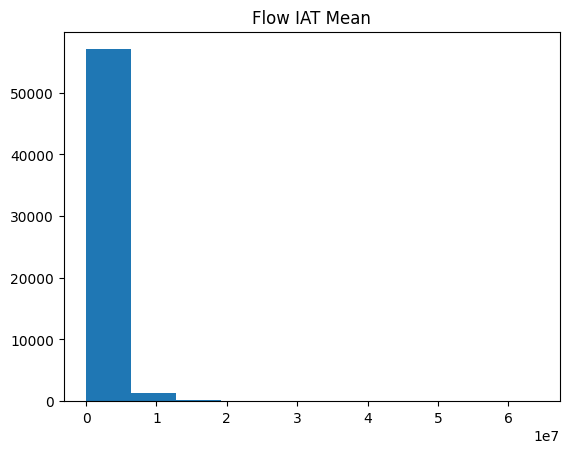

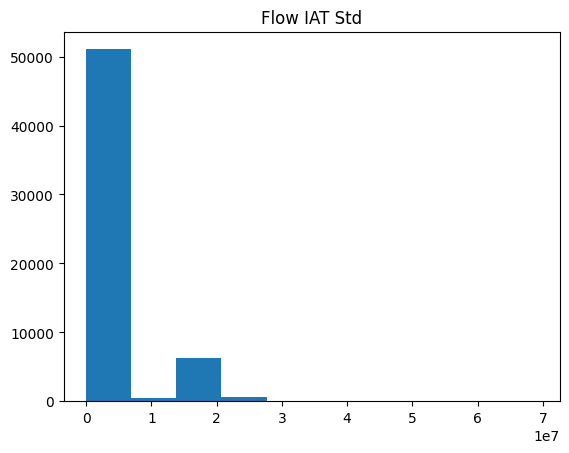

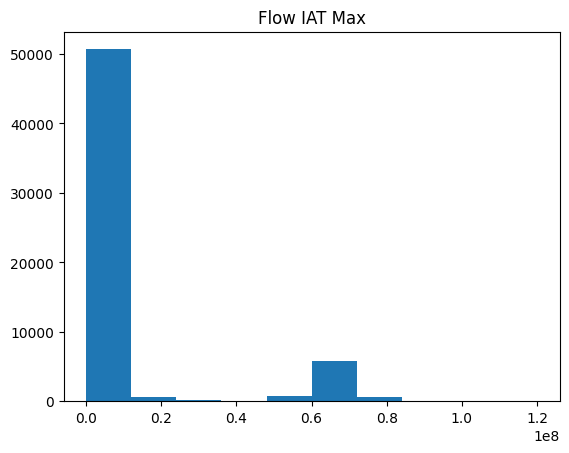

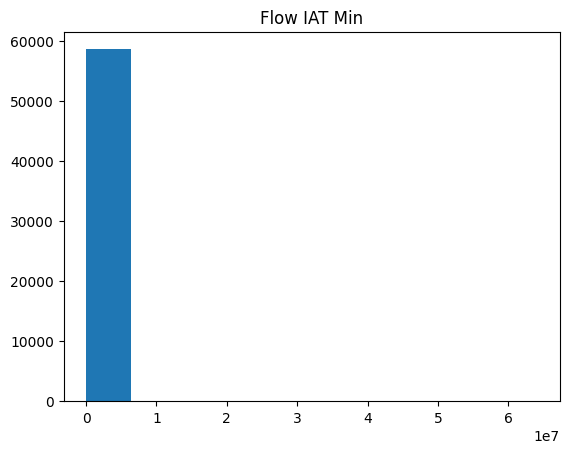

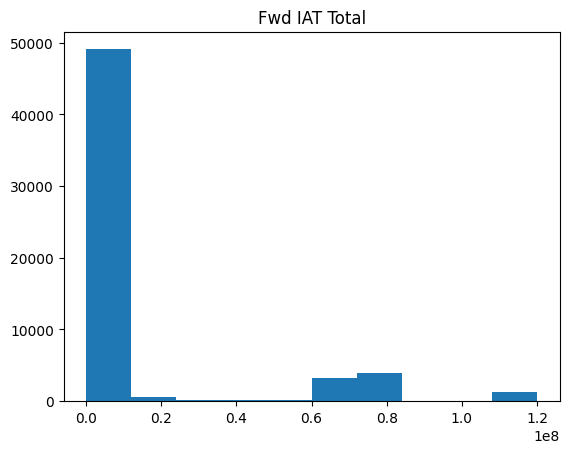

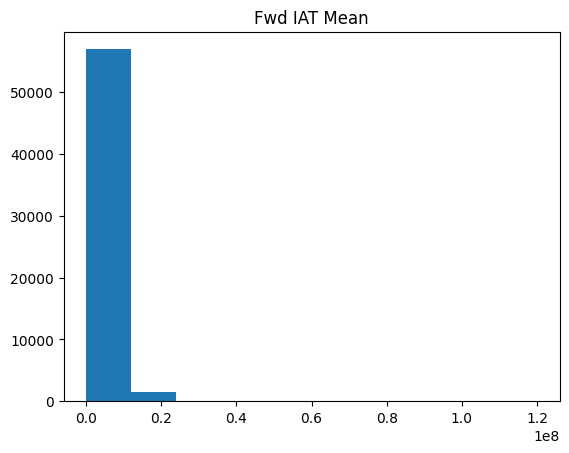

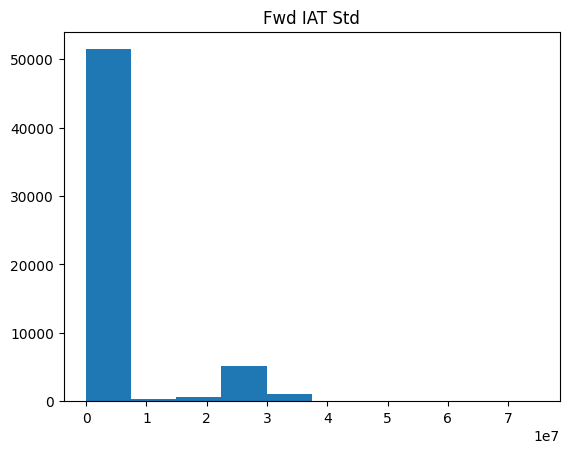

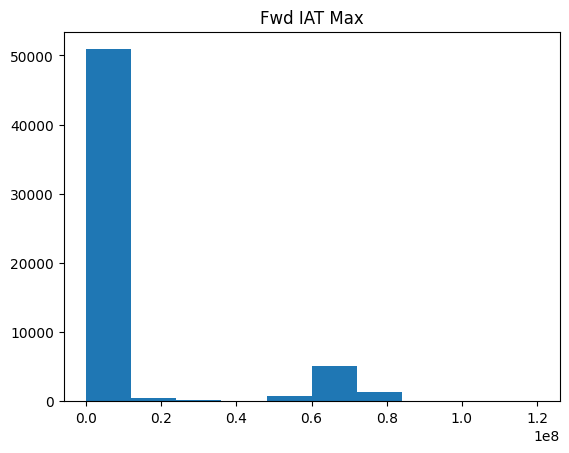

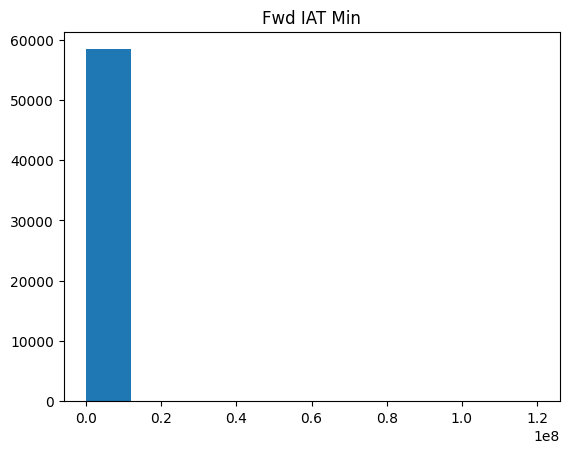

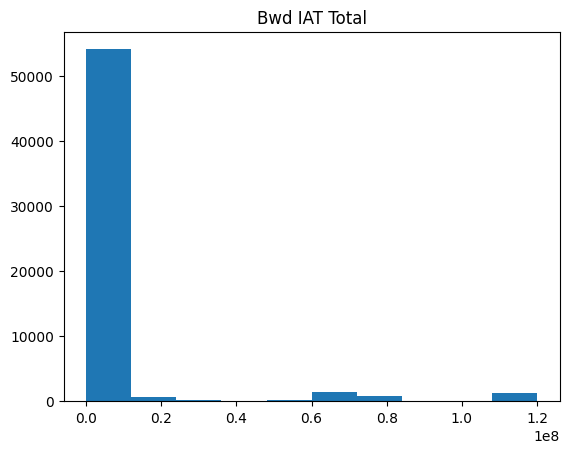

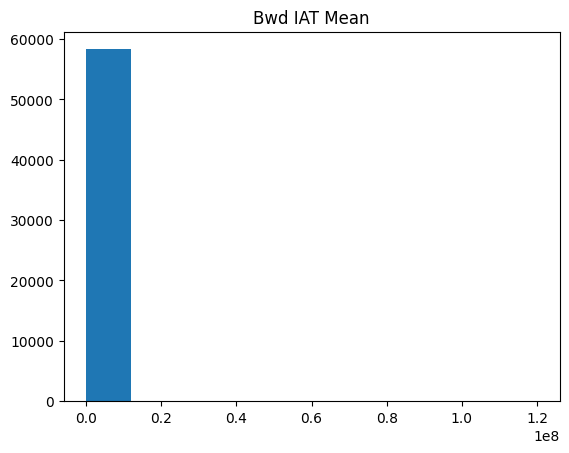

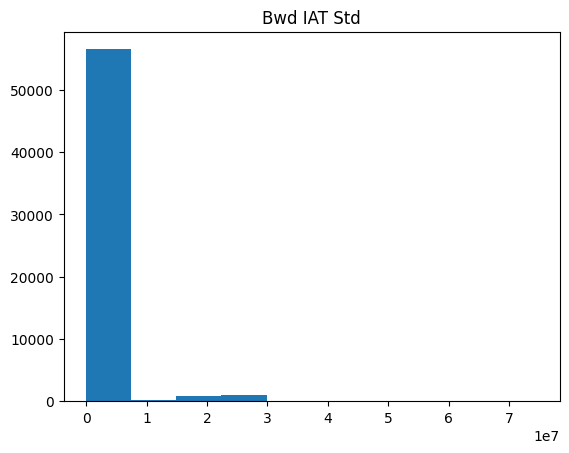

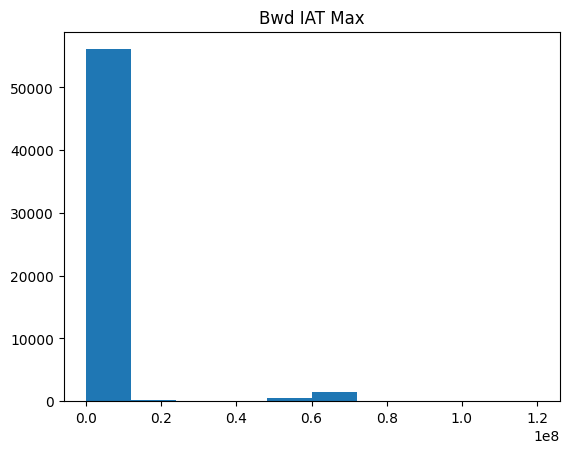

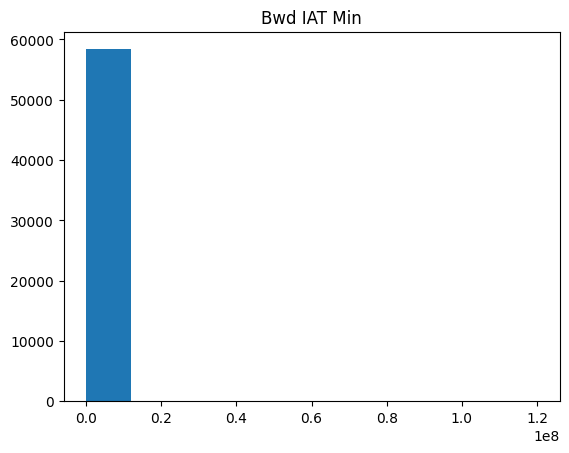

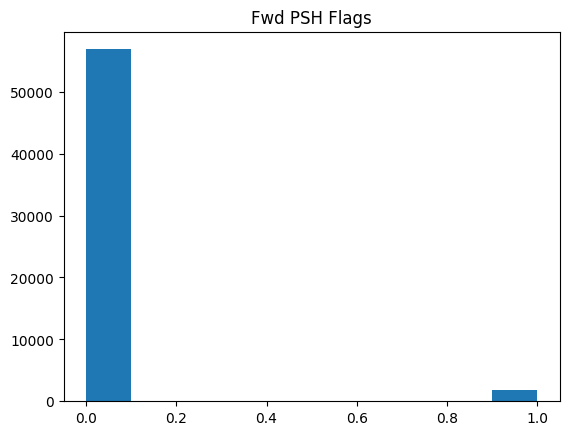

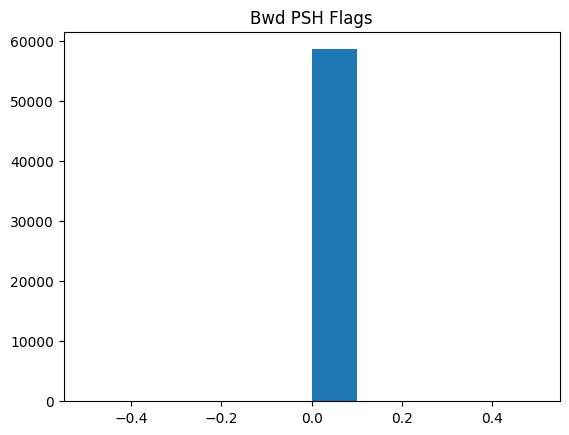

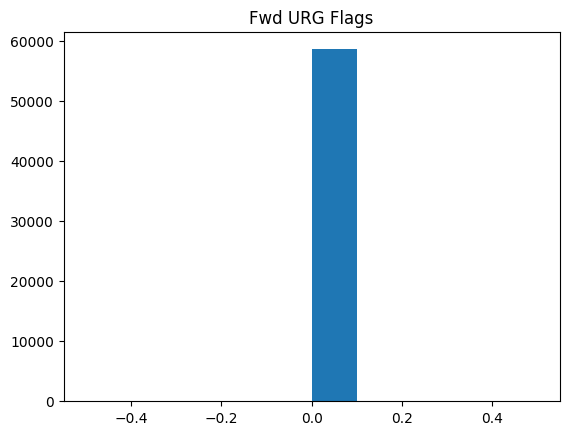

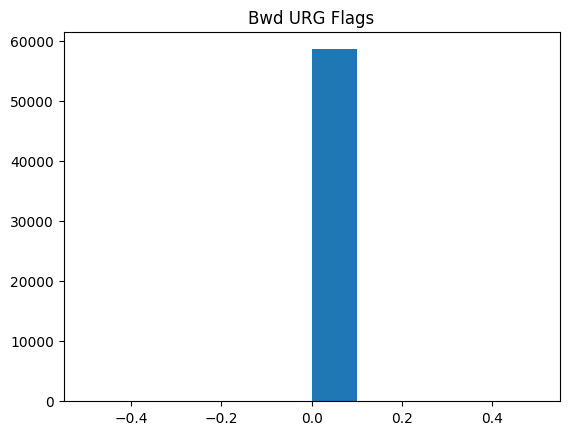

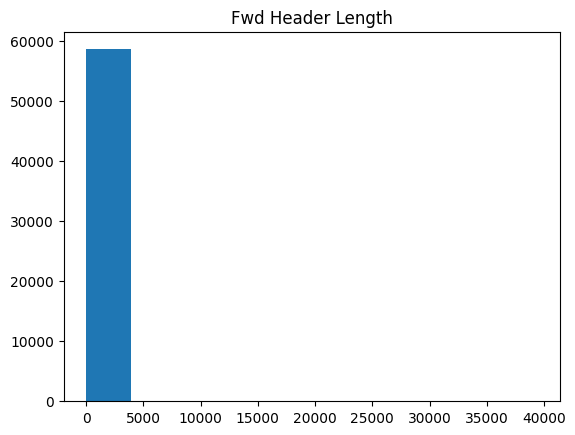

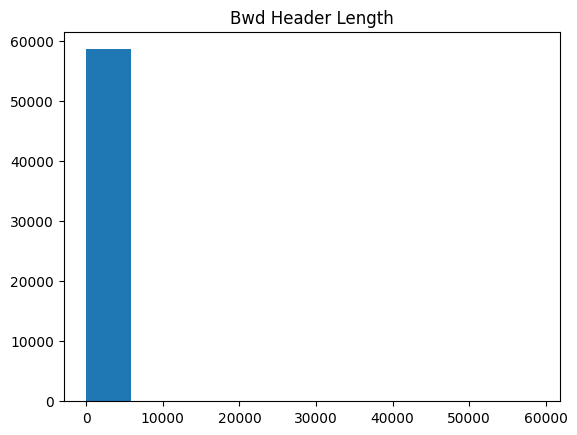

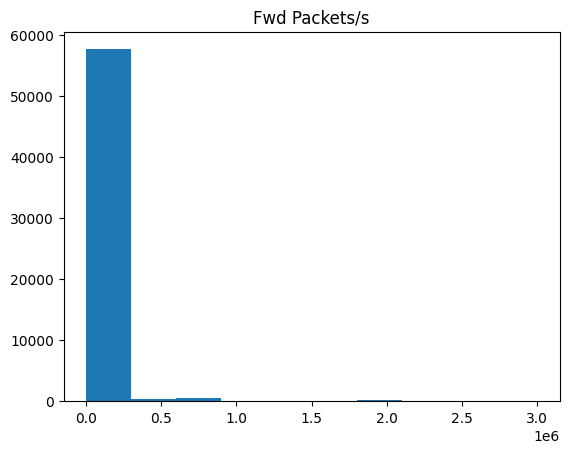

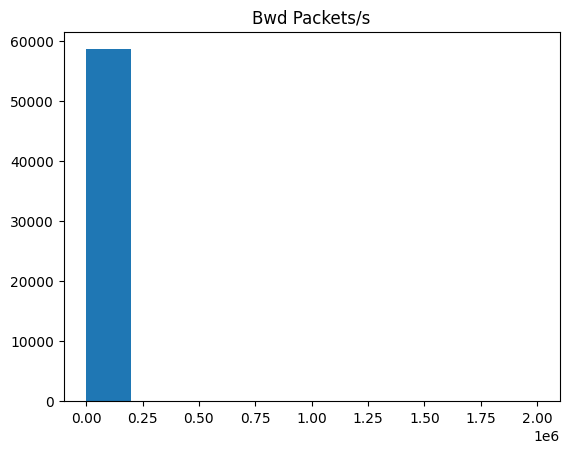

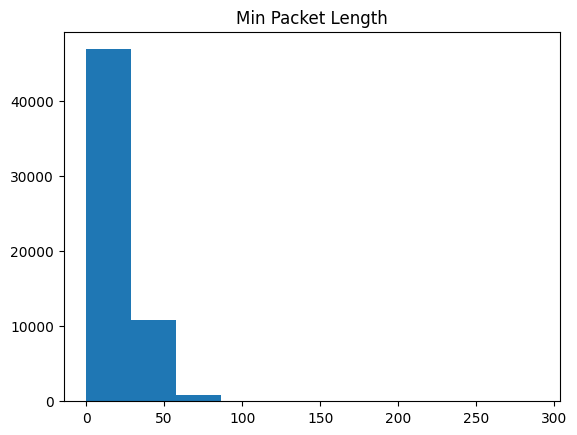

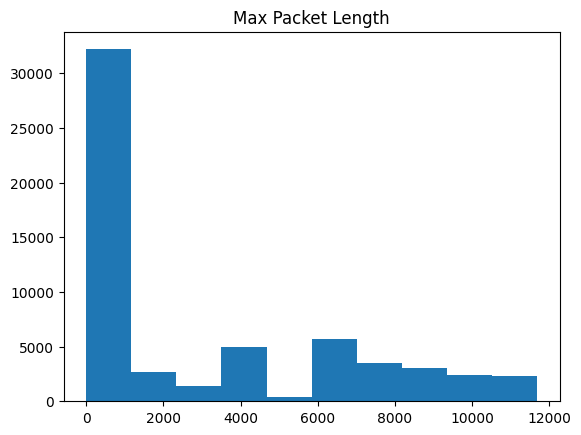

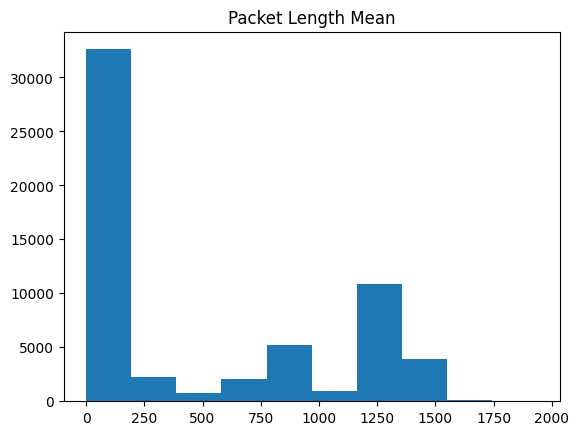

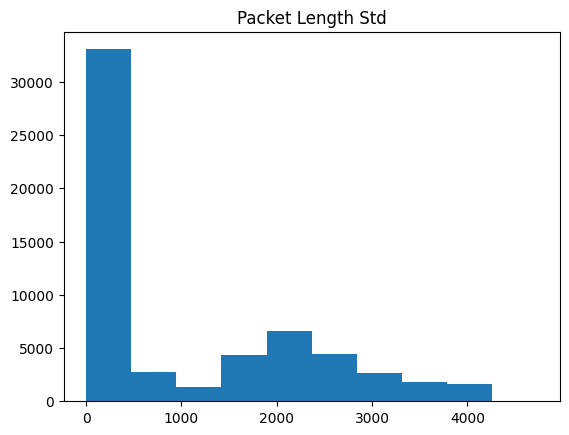

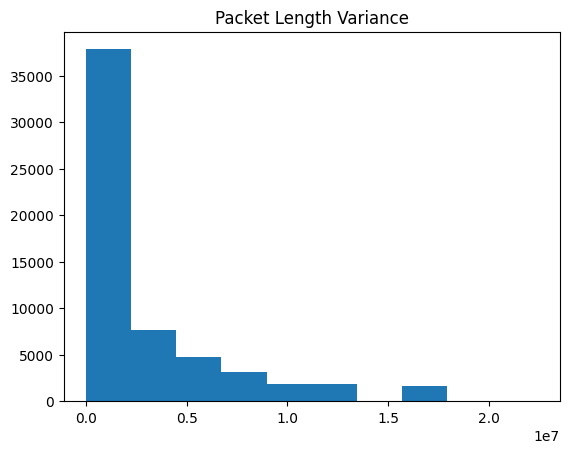

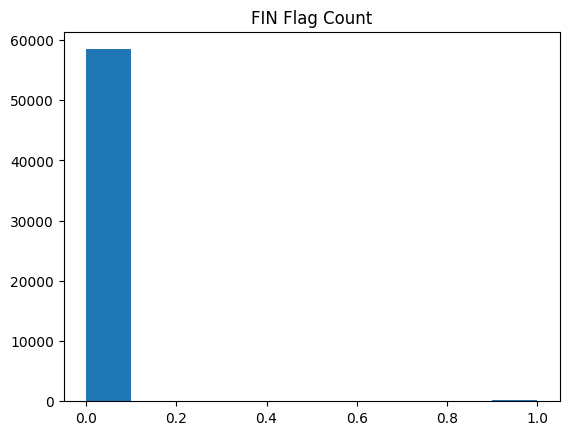

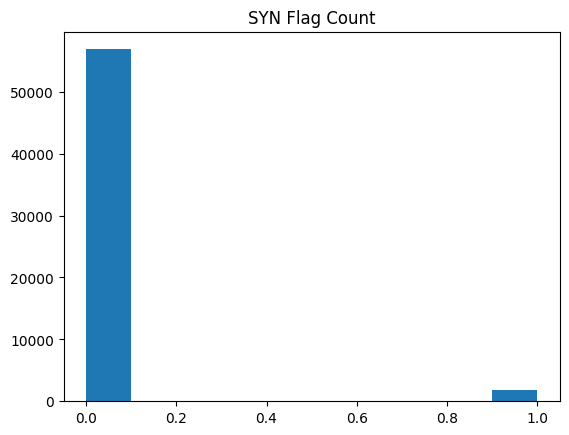

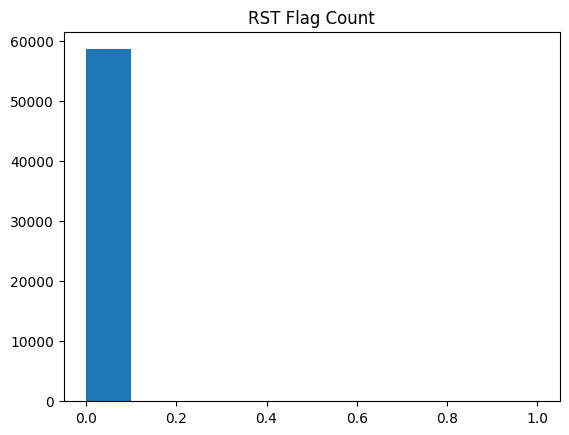

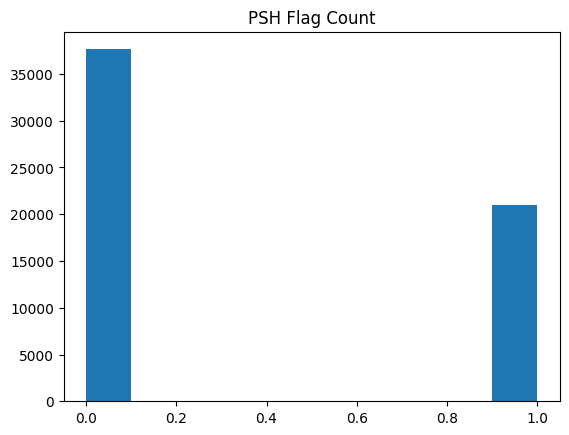

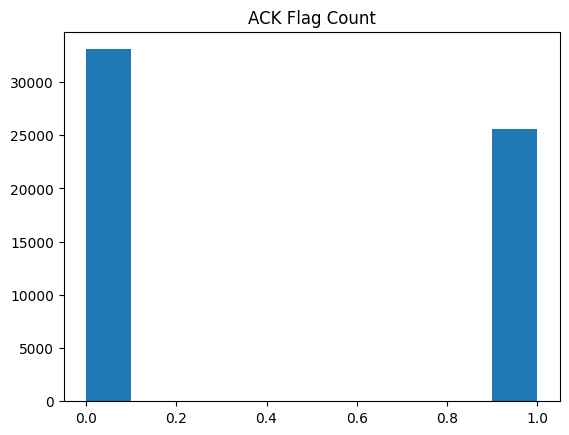

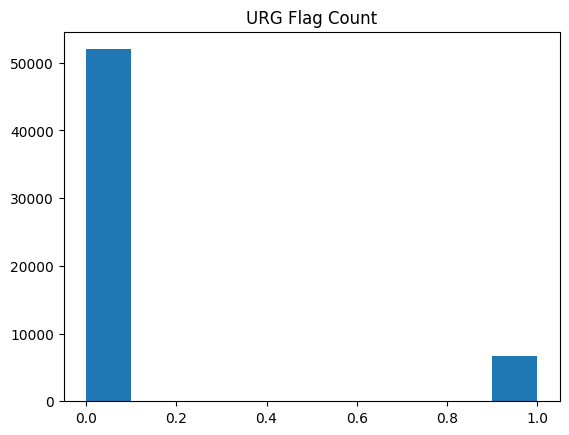

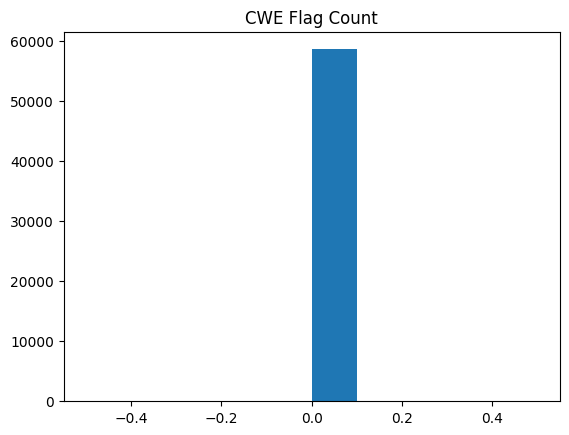

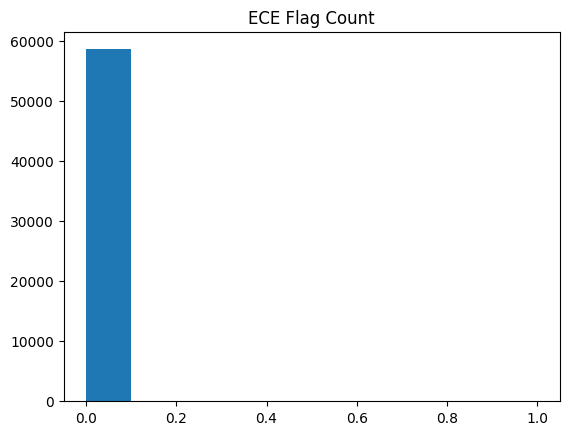

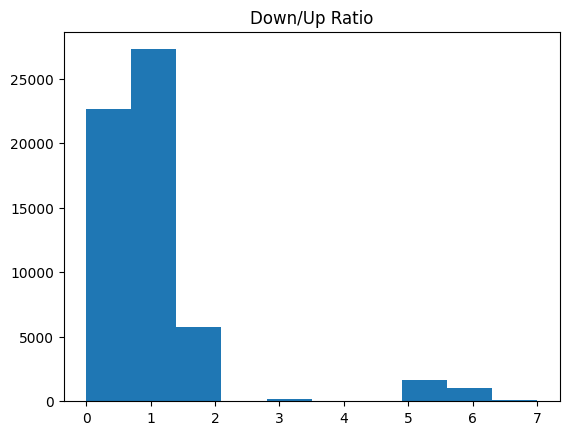

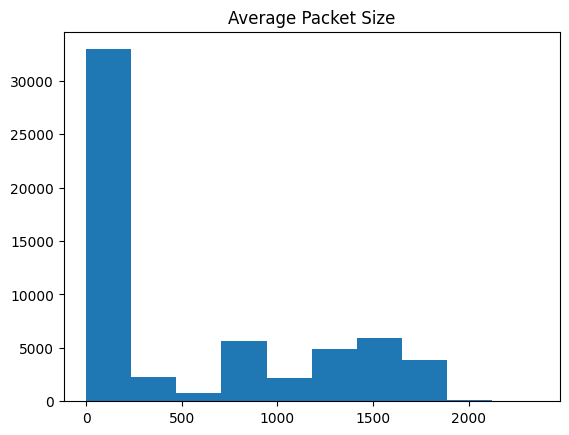

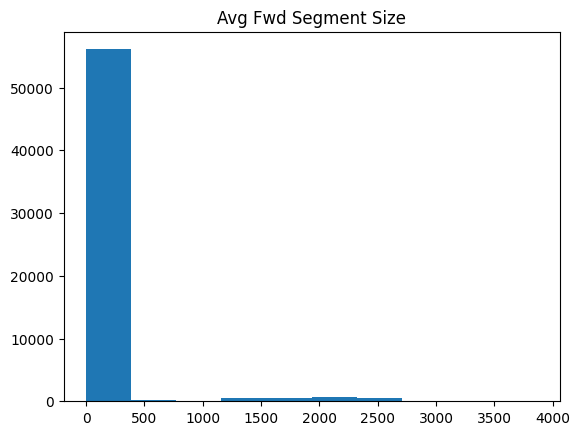

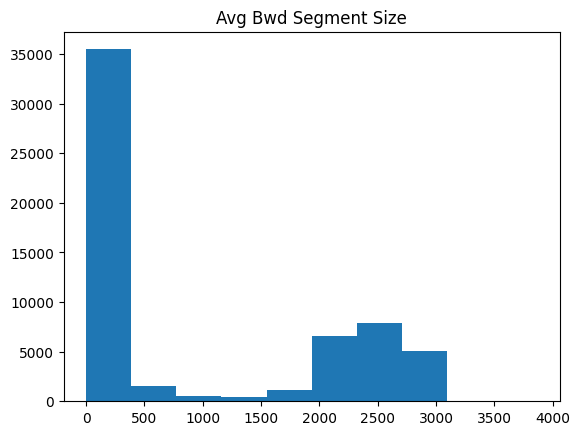

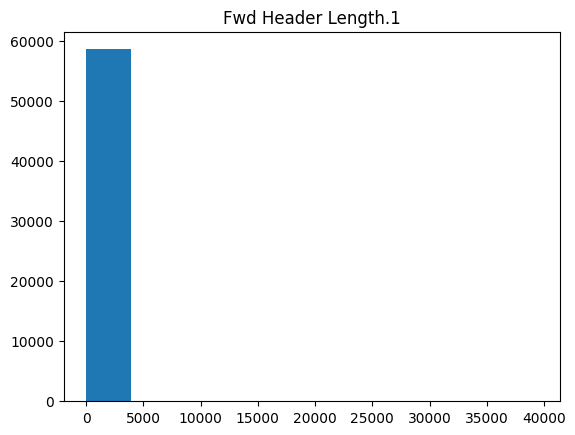

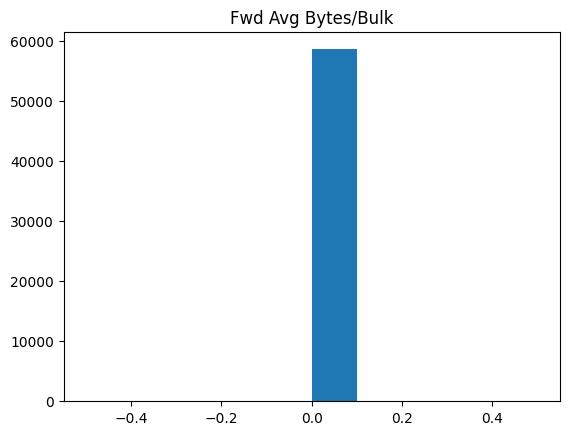

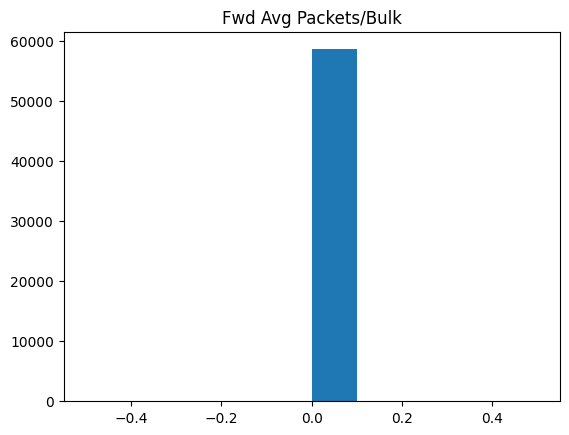

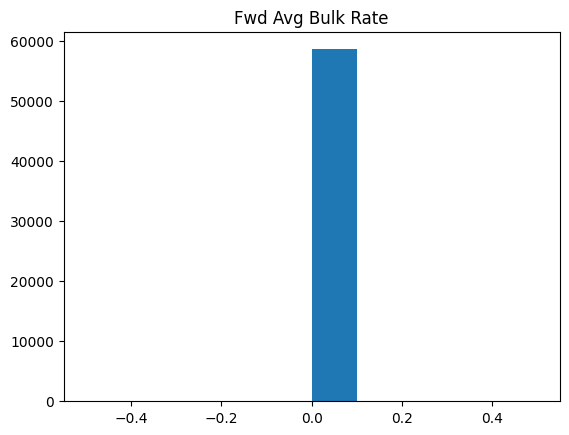

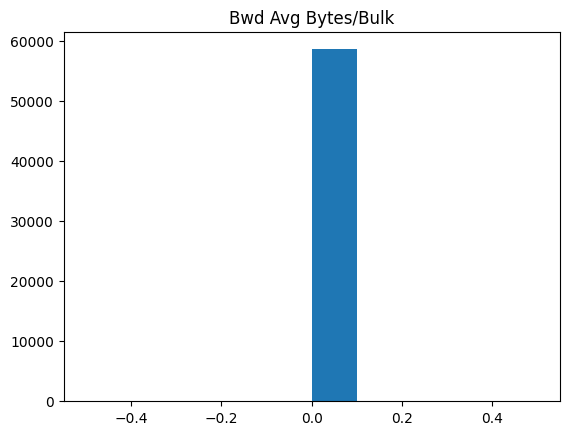

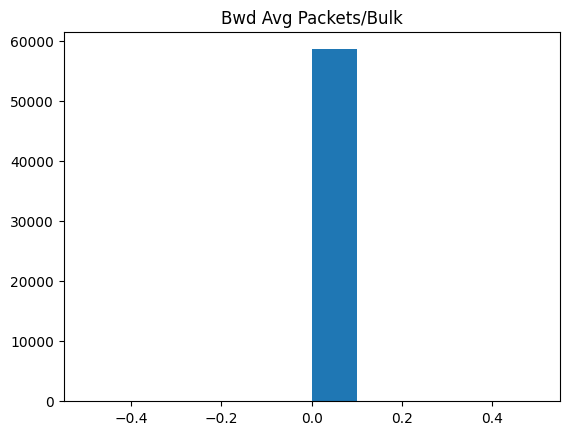

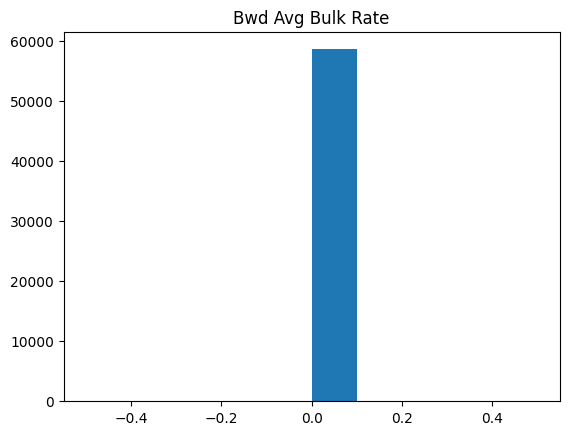

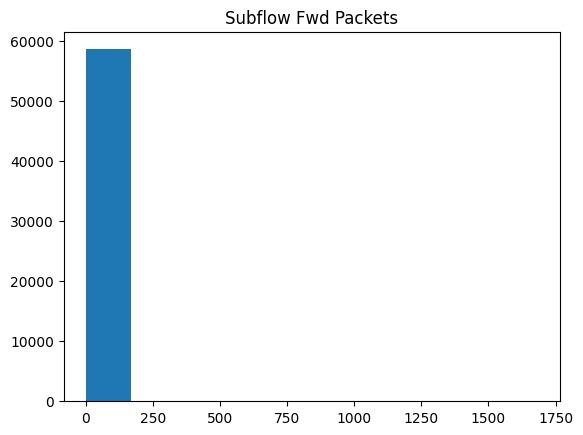

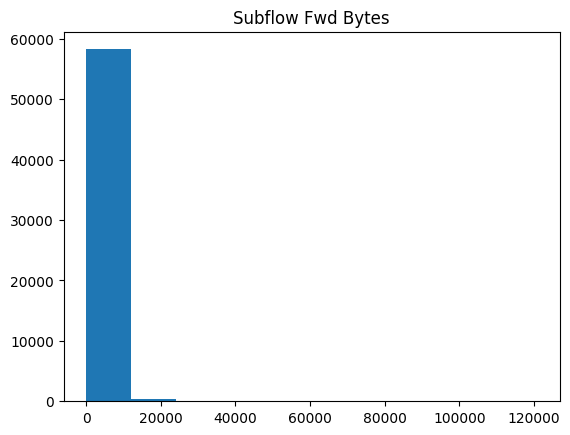

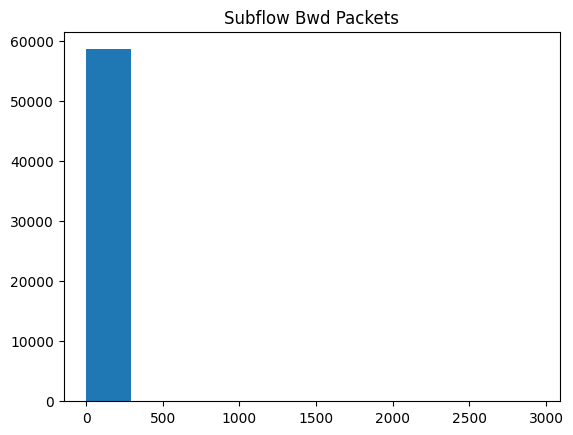

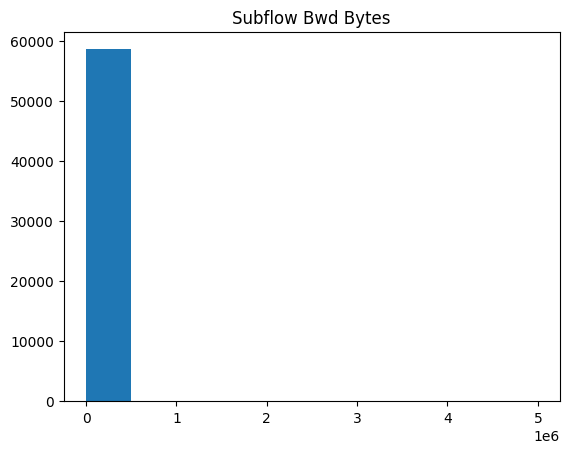

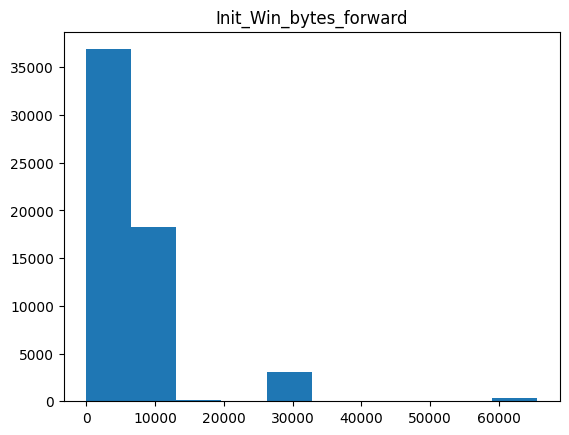

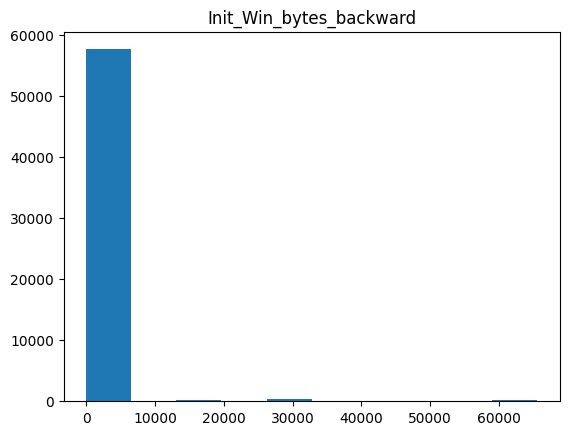

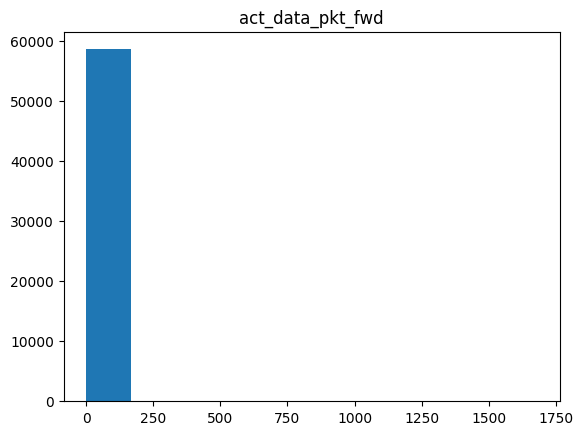

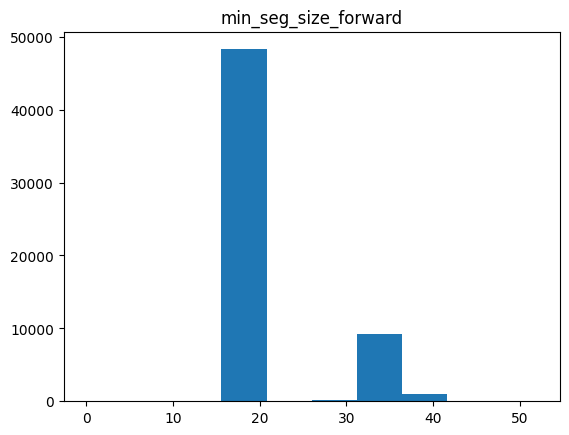

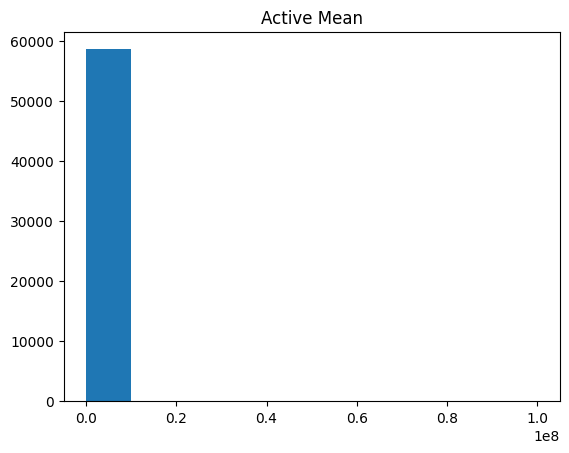

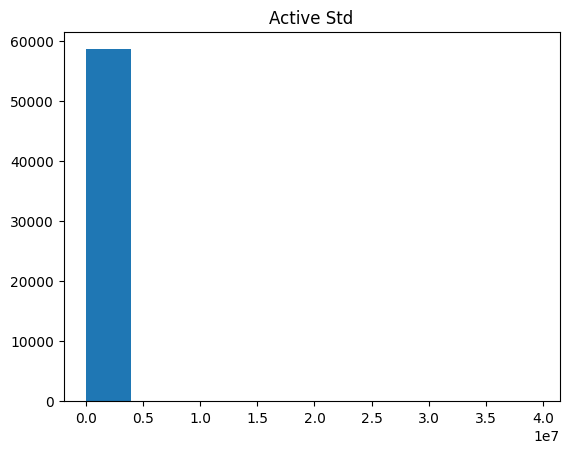

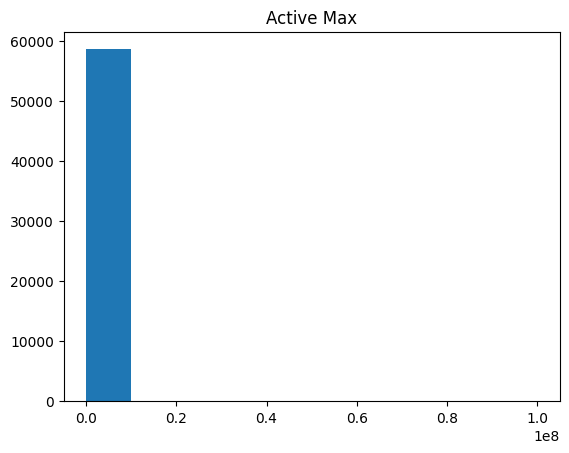

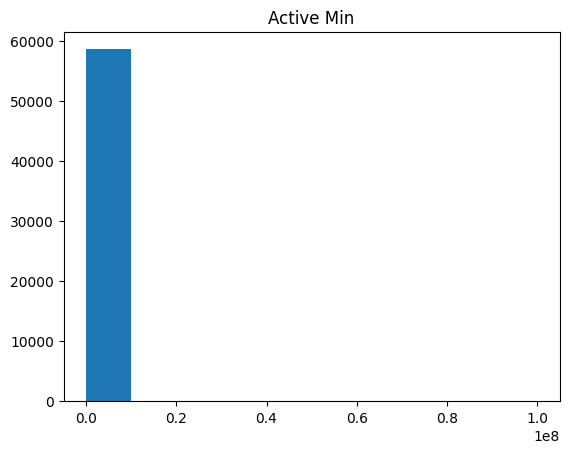

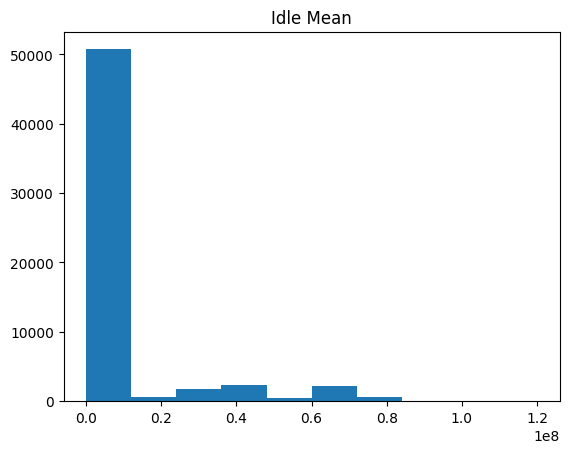

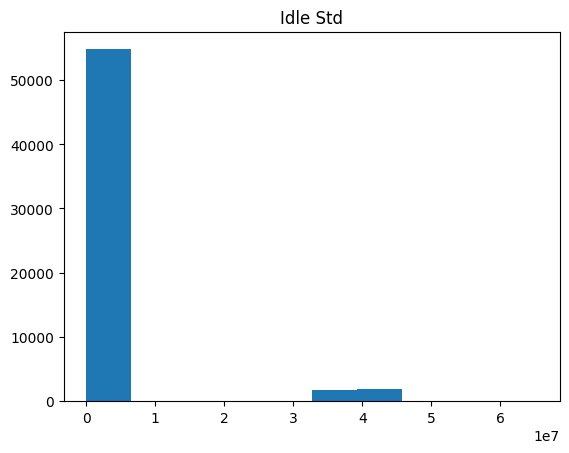

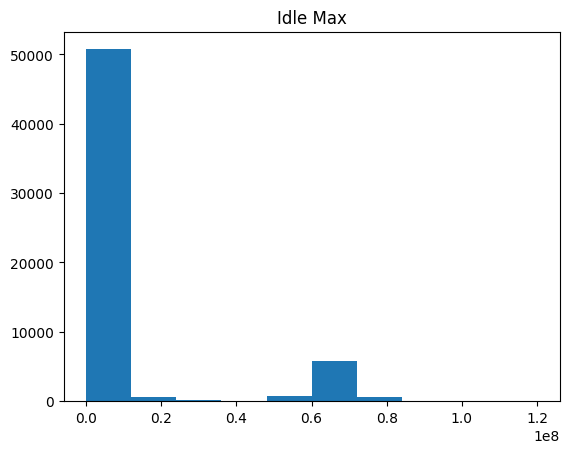

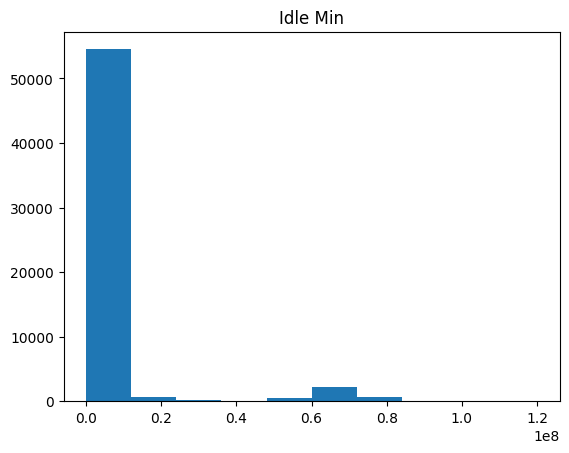

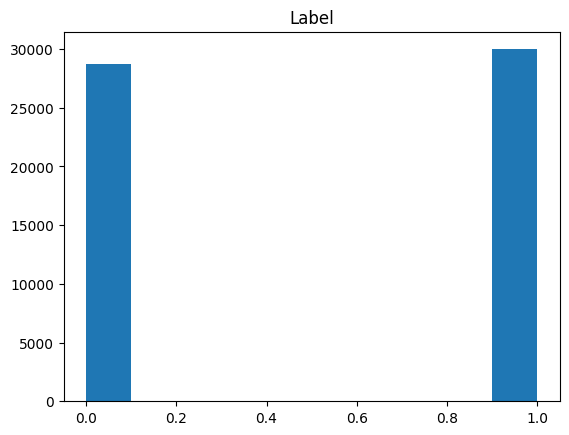

In [ ]:
# Data Exploration
print("Statistical Summary of the Dataset:")
print(df.describe())

plt.figure(figsize=(10, 6))
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

In [ ]:
# Data Splitting
X = data_f.drop('Label', axis=1)
y = data_f['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model Training - Random Forest
print("Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained Successfully!")

# Model Training - Neural Network
print("Training Neural Network Model...")
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
print("Neural Network Model Trained Successfully!")

# Model Training - Logistic Regression
print("Training Logistic Regression Model...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr_model.fit(X_train_scaled, y_train)
print("Logistic Regression Model Trained Successfully!")

# Evaluate Models
evaluate_model(rf_model, X_test, y_test, 'Random Forest')
evaluate_model(nn_model, X_test, y_test, 'Neural Network')
evaluate_model(lr_model, X_test_scaled, y_test, 'Logistic Regression')

# Hybrid Model - Averaging
print("Creating Hybrid Model...")
rf_pred_proba = rf_model.predict_proba(X_test)
nn_pred_proba = nn_model.predict_proba(X_test)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)

# hybrid_pred_proba = (rf_pred_proba + nn_pred_proba + lr_pred_proba) / 3
hybrid_pred_proba = (rf_pred_proba + nn_pred_proba ) / 2

# Evaluate the Hybrid Model using evaluate_model function
evaluate_model(None, X_test, y_test, 'Hybrid Model')

# Create a DataFrame to store the model metrics
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'Logistic Regression', 'Hybrid Model'],
    'Accuracy': [rf_accuracy, nn_accuracy, lr_accuracy, hybrid_accuracy],
    'F1 Score': [rf_f1, nn_f1, lr_f1, hybrid_f1],
    'Precision': [rf_precision, nn_precision, lr_precision, hybrid_precision],
    'Recall': [rf_recall, nn_recall, lr_recall, hybrid_recall]
})

# Display the model comparison table
print("Model Comparison:")
print(model_comparison)

Training Random Forest Model...
Random Forest Model Trained Successfully!
Training Neural Network Model...
Neural Network Model Trained Successfully!
Training Logistic Regression Model...
Logistic Regression Model Trained Successfully!
Random Forest Model Evaluation:
Accuracy: 0.9998
F1 Score: 0.9998
Precision: 1.0000
Recall: 0.9997
Neural Network Model Evaluation:
Accuracy: 0.9569
F1 Score: 0.9593
Precision: 0.9223
Recall: 0.9993
Logistic Regression Model Evaluation:
Accuracy: 0.9983
F1 Score: 0.9983
Precision: 0.9974
Recall: 0.9992
Creating Hybrid Model...
Hybrid Model Model Evaluation:
Accuracy: 0.9990
F1 Score: 0.9990
Precision: 0.9988
Recall: 0.9993
Model Comparison:
                 Model  Accuracy  F1 Score  Precision    Recall
0        Random Forest  0.999830  0.999832   1.000000  0.999664
1       Neural Network  0.956934  0.959282   0.922322  0.999328
2  Logistic Regression  0.998296  0.998323   0.997430  0.999217
3         Hybrid Model  0.999091  0.999105   0.998658  0.999552